Project 1 Final code
    Scott Brown
    John Plakon
    Melissa Roman


In [1]:
#Project 1 Final code

from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import time
from us import states
from config import gkey
import gmaps
import scipy.stats as stats
from scipy.stats import pareto
import scipy
import scipy.stats
import itertools
from pandas.plotting import table 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [54]:
#Getting the data in a usable form.

# Keeps first row of header and drops the other 2 header rows.
# Drops the blank rows and the total row since it is redundant.
# Fillna(0) and replace.({'**': 0}) replaced NaN and ** values with zeros.


Florida_data= pd.read_excel('Resources/16zp10fl.xls', sheetname='Sheet1', header=3)
Florida_data=Florida_data.drop(Florida_data.index[0:3])
Florida_data=Florida_data.rename(columns= {"ZIP\ncode [1]": "Zip Code"})
Florida_data=Florida_data.dropna(how="all")
Florida_data=Florida_data.dropna(subset=["Size of adjusted gross income"])
Florida_data=Florida_data.fillna(0)
Florida_data=Florida_data.replace({'**': 0})
    
    
# Rename the income brackets.    
Florida_data["Size of adjusted gross income"]= \
Florida_data["Size of adjusted gross income"].replace({ \
          "$1 under $25,000": "Under 25,000", 
          "$25,000 under $50,000": "25,000 to 50,000",
          "$50,000 under $75,000": "50,000 to 75,000", 
          "$75,000 under $100,000": "75,000 to 100,000",
          "$100,000 under $200,000": "100,000 to 200,000",
          "$200,000 or more": "Over 200,000"
          } 
          )

# Modified Zip Code Excel Sheet.
Florida_zip=pd.read_excel('Resources/Zip_Codes.xlsx')
Florida_zip=Florida_zip.rename(columns={"zip": "Zip Code", "primary_city": "City"})


# Turns Zip Code variable into integers for both sets so it will merge properly.
Florida_data["Zip Code"]=Florida_data["Zip Code"].astype(int)
Florida_zip["Zip Code"]=Florida_zip["Zip Code"].astype(int)


# Merges both on Zip Codes.
Florida_complete=pd.merge(Florida_zip, Florida_data, on='Zip Code')


# Renaming columns - Control + / to uncomment everything
Florida_complete=Florida_complete.rename(columns={
"Number with paid preparer's signature": "Number of returns with paid preparer's signature",
"Number of exemptions": "Number of returns with exemptions" ,
"Number of dependents": "Number of dependents on returns",
"Number of volunteer prepared returns [2]": "Total Number of volunteer prepared returns",
"Unnamed: 10": "Number of volunteer income tax assistance prepared returns",                                                  
"Unnamed: 11": "Number of tax counseling for the elderly prepared returns",                                                  
"Unnamed: 12": "Number of volunteer prepared returns with Earned Income Credit",                                                                                                   
"Number of elderly returns [3]": "Number of elderly returns",                                                  
"Adjusted gross income (AGI) [4]": "Adjusted gross income (AGI): Amount",                                                  
"Total income": "Total income: Number of returns",                                                  
"Unnamed: 18": "Total income: Amount",                                                  
"Salaries and wages in AGI": "Salaries and wages in AGI: Number of returns",                                                  
"Unnamed: 20": "Salaries and wages in AGI: Amount",                                                  
"Taxable interest": "Taxable interest: Number of returns",                                                  
"Unnamed: 22": "Taxable interest: Amount",                                                  
"Ordinary dividends": "Ordinary dividends: Number of returns",                                                  
"Unnamed: 24": "Ordinary dividends: Amount",                                                  
"Qualified dividends [5]": "Qualified dividends: Number of returns",                                                  
"Unnamed: 26": "Qualified dividends: Amount",                                                  
"State and local income tax refunds\n": "State and local income tax refunds: Number of returns",                                                  
"Unnamed: 28": "State and local income tax refunds: Number of returns",                                                  
"Business or profession\net income": "Business or profession net income: Number of returns",                                                  
"Unnamed: 30": "Business or profession net income: Amount",
"Net capital gain (less loss) in AGI": "Net capital gain in AGI: Number of returns",                                                  
"Unnamed: 32": "Net capital gain in AGI: Amount",                                                  
"Taxable individual retirement\narrangement distributions": "Taxable individual retirement arrangement distributions: Number of returns",                                                  
"Unnamed: 34": "Taxable individual retirement arrangement distributions: Amount",                                                  
"Pensions and annuities in AGI": "Pensions and annuities in AGI: Number of returns",                                                  
"Unnamed: 36": "Pensions and annuities in AGI: Amount",                                                  
"Number of \nfarm returns": "Number of farm returns",
"Business or profession\nnet income (less loss)":"Business or profession net income: Number of returns",
"Unemployment compensation [6]": "Unemployment compensation: Number of returns",
"Unnamed: 39": "Unemployment compensation: Amount",
"Taxable Social Security benefits": "Taxable Social Security benefits: Number of returns",                                                  
"Unnamed: 41": "Taxable Social Security benefits: Amount",                                                  
"Partnership/S-corp net income (less loss)": "Partnership/S-corp net income: Number of returns",                                                  
"Unnamed: 43": "Partnership/S-corp net income: Amount",                                                  
"Total statuory adjustments": "Total statuory adjustments: Number of returns",                                                  
"Unnamed: 45": "Total statuory adjustments: Amount",                                                  
"Educator expenses": "Educator expenses: Number of returns",                                                  
"Unnamed: 47": "Educator expenses: Amount",                                                  
"Self-employed (Keogh) retirement plans": "Self-employed (Keogh) retirement plans: Number of returns",                                                  
"Unnamed: 49": "Self-employed (Keogh) retirement plans: Amount",                                                  
"Self-employed health insurance deduction": "Self-employed health insurance deduction: Number of returns",
"Unnamed: 51": "Self-employed health insurance deduction: Amount",                                                  
"Individual retirement arrangement payments": "Individual retirement arrangement payments: Number of returns",                                                  
"Unnamed: 53": "Individual retirement arrangement payments: Amount",                                                  
"Student loan interest deduction": "Student loan interest deduction: Number of returns",                                                  
"Unnamed: 55": "Student loan interest deduction: Amount",                                                  
"Tuition and fees deduction": "Tuition and fees deduction: Number of returns",                                                  
"Unnamed: 57": "Tuition and fees deduction: Amount",                                                  
"Domestic production activities deduction": "Domestic production activities deduction: Number of returns",                                                  
"Unnamed: 59": "Domestic production activities deduction: Amount",                                                  
"Total itemized deductions": "Total itemized deductions: Number of returns",                                                  
"Unnamed: 61": "Total itemized deductions: Amount",
"Unnamed: 62": "Total itemized deductions: Amount of AGI",
"Total medical and dental \nexpenses deduction": "Total medical and dental expenses deduction: Number of returns",
"Unnamed: 64": "Total medical and dental expenses deduction: Amount",                                                  
"State and local income taxes": "State and local income taxes: Number of returns",                                                  
"Unnamed: 66": "State and local income taxes: Amount",                                                  
"State and local general sales taxes": "State and local general sales taxes: Number of returns",                                                  
"Unnamed: 68": "State and local general sales taxes: Amount",                                                  
"Real estate taxes": "Real estate taxes: Number of returns",                                                  
"Unnamed: 70": "Real estate taxes: Amount",                                                  
"Personal property taxes": "Personal property taxes: Number of returns",                                                  
"Unnamed: 72": "Personal property taxes: Amount",                                                  
"Total taxes paid": "Total taxes paid: Number of returns",                                                  
"Unnamed: 74": "Total taxes paid: Amount",
"Home mortgage interest paid ": "Home mortgage interest paid: Number of returns",
"Unnamed: 76": "Home mortgage interest paid: Amount",                                                  
"Home mortgage interest paid \nfrom personal seller": "Home mortgage interest paid from personal seller: Number of returns",                                                  
"Unnamed: 78": "Home mortgage interest paid from personal seller: Amount",                                                  
"Deductible points": "Deductible points: Number of returns",                                                  
"Unnamed: 80": "Deductible points: Amount",                                                  
"Qualified mortgage insurance premiums": "Qualified mortgage insurance premiums: Number of returns",                                                  
"Unnamed: 82": "Qualified mortgage insurance premiums: Amount",                                                  
"Investment interest paid": "Investment interest paid: Number of returns",                                                  
"Unnamed: 84": "Investment interest paid: Amount",                                                  
"Total charitable contributions": "Total charitable contributions: Number of returns",                                                  
"Unnamed: 86": "Total charitable contributions: Amount",
"Net limited miscellaneous deduction": "Net limited miscellaneous deduction: Number of returns",
"Unnamed: 88": "Net limited miscellaneous deduction: Amount",                                                  
"Other non-limited \nmiscellaneous deduction": "Other non-limited miscellaneous deduction: Number of returns",                                                  
"Unnamed: 90": "Other non-limited miscellaneous deduction: Amount",                                                  
"Taxable income": "Taxable income: Number of returns",                                                  
"Unnamed: 92": "Taxable income: Amount",                                                  
"Income tax before credits": "Income tax before credits: Number of returns",                                                  
"Unnamed: 94": "ncome tax before credits: Amount",                                                  
"Alternative minimum tax": "Alternative minimum tax: Number of returns",                                                  
"Unnamed: 96": "Alternative minimum tax: Amount",                                                  
"Excess advance \npremium tax credit repayment": "Excess advance premium tax credit repayment: Number of returns",                                                  
"Unnamed: 98": "Excess advance premium tax credit repayment: Amount",
"Total tax credits": "Total tax credits: Number of returns",
"Unnamed: 100": "Total tax credits: Amount",                                                  
"Foreign tax credit": "Foreign tax credit: Number of returns",                                                  
"Unnamed: 102": "Foreign tax credit: Amount",                                                  
"Child and dependent care credit": "Child and dependent care credit: Number of returns",                                                  
"Unnamed: 104": "Child and dependent care credit: Amount",                                                  
"Nonrefundable education credit": "Nonrefundable education credit: Number of returns",                                                  
"Unnamed: 106": "Nonrefundable education credit: Amount",                                                  
"Retirement savings contributions credit": "Retirement savings contributions credit: Number of returns",                                                  
"Unnamed: 108": "Retirement savings contributions credit: Amount",                                                  
"Child tax credit": "Child tax credit: Number of returns",                                                  
"Unnamed: 110": "Child tax credit: Amount",
"Residential energy tax credit": "Residential energy tax credit: Number of returns",
"Unnamed: 112": "Residential energy tax credit: Amount",                                                  
"Self-employment tax": "Self-employment tax: Number of returns",                                                  
"Unnamed: 114": "Self-employment tax: Amount",                                                  
"Total premium tax credit": "Total premium tax credit: Number of returns",                                                  
"Unnamed: 116": "Total premium tax credit: Amount",                                                  
"Advance premium tax credit": "Advance premium tax credit: Number of returns",                                                  
"Unnamed: 118": "Advance premium tax credit: Amount",                                                  
"Health care individual \nresponsibility payment": "Health care individual responsibility payment: Number of returns",           
"Unnamed: 120": "Health care individual responsibility payment: Amount",                                                  
"Total tax payments": "Total tax payments: Number of returns",            
"Unnamed: 122": "Total tax payments: Amount",                                                  
"Earned income credit [7]": "Earned income credit: Number of returns",                                                  
"Unnamed: 124": "Earned income credit: Amount",
"Excess earned income credit \n(refundable) [8]": "Excess earned income credit (refundable): Number or returns",
"Unnamed: 126": "Excess earned income credit (refundable): Amount",                                                  
"Additional child tax credit": "Additional child tax credit: Number of returns",                                                  
"Unnamed: 128": "Additional child tax credit: Amount",                                                  
"Refundable education credit": "Refundable education credit: Number of returns",                                                  
"Unnamed: 130": "Refundable education credit: Amount",                                                  
"Net premium tax credit": "Net premium tax credit: Number of returns",                                                  
"Unnamed: 132": "Net premium tax credit: Amount",                                                  
"Income tax [9]": "Income tax: Number of returns",                                                  
"Unnamed: 134": "Income tax: Amount",                                                  
"Total tax liability [10]": "Total tax liability: Number of returns",                                                  
"Unnamed: 136": "Total tax liability: Amount",
"Total additional Medicare tax": "Total additional Medicare tax: Number of returns",
"Unnamed: 138": "Total additional Medicare tax: Amount",                                                  
"Net investment income tax": "Net investment income tax: Number of returns",                                                  
"Unnamed: 140": "Net investment income tax: Amount",                                                  
"Tax due at time of filing [11]": "Tax due at time of filing: Number of returns",                                                  
"Unnamed: 142": "Tax due at time of filing: Amount",                                                  
"Overpayments refunded [12]": "Overpayments refunded: Number of returns",                                                  
"Unnamed: 144": "Overpayments refunded: Amount",                                                  
}
)

# Florida complete contains zip codes and cities.
# Drops zip codes to just yield cities.
Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)

In [3]:
# Florida_cities is the main dataframe is use.
# Zip codes are dropped as they are not needed for all questions.
# Data is grouped by City and Size of adjusted gross income for analytical purposes.

Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)
Florida_cities=Florida_cities.groupby([ \
                "City", "Size of adjusted gross income"], sort=False).sum().reset_index()



Florida_cities.to_html("Florida_cities.html")
Florida_cities["Size of adjusted gross income"]=Florida_cities["Size of adjusted gross income"].str.wrap(1000)
Florida_cities.head(10)

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of returns with paid preparer's signature,Number of returns with exemptions,Number of dependents on returns,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fleming Island,"Under 25,000",3470.0,2780.0,340.0,300.0,1200.0,3340.0,750.0,80,...,1670,1372,0,0,0,0,300,231,2890,4093
1,Fleming Island,"25,000 to 50,000",2200.0,1110.0,620.0,390.0,870.0,4020.0,1210.0,30,...,1880,5091,0,0,0,0,380,626,1780,4536
2,Fleming Island,"50,000 to 75,000",1860.0,640.0,890.0,270.0,830.0,4100.0,1350.0,50,...,1770,9734,0,0,0,0,470,1037,1340,4073
3,Fleming Island,"75,000 to 100,000",1520.0,280.0,1080.0,120.0,670.0,3870.0,1270.0,0,...,1510,13047,0,0,0,0,430,1147,1060,3588
4,Fleming Island,"100,000 to 200,000",2930.0,240.0,2580.0,110.0,1320.0,8400.0,2900.0,0,...,2930,52720,0,0,0,0,1120,4194,1730,6898
5,Fleming Island,"Over 200,000",990.0,50.0,900.0,30.0,640.0,3040.0,1150.0,0,...,990,83779,440,537,450,898,500,12766,400,3984
6,Branford,"Under 25,000",870.0,480.0,170.0,200.0,350.0,1390.0,430.0,30,...,410,372,0,0,0,0,70,48,730,1669
7,Branford,"25,000 to 50,000",580.0,230.0,220.0,100.0,250.0,1190.0,390.0,0,...,470,1164,0,0,0,0,70,92,500,1431
8,Branford,"50,000 to 75,000",300.0,80.0,190.0,40.0,170.0,660.0,180.0,0,...,280,1569,0,0,0,0,60,129,230,602
9,Branford,"75,000 to 100,000",160.0,30.0,140.0,0.0,90.0,430.0,130.0,0,...,160,1326,0,0,0,0,40,113,120,412


In [4]:
# Florida_cities but indexed for display purposes.
# Most income related data will get multiplied by 1000 due to the original data
# being listed in thousands of dollars.
# Example ->  $100,000 is in reality $100,000,000.

# This is only kept to display the dataframe mapping error that could not be
# fixed and needed a workaround.  The end goal is to have all currency columns
# formatted as $100,000 and all non currency columns to be formatted as 100,000.


Florida_cities_indexed=Florida_complete
Florida_cities_indexed=Florida_cities_indexed.drop("Zip Code", axis=1)
Florida_cities_indexed=Florida_cities_indexed.groupby([\
                        "City", "Size of adjusted gross income"], sort=False).sum()



for col in Florida_cities_indexed.columns:
    if "Amount" in col:
        Florida_cities_indexed[col]= Florida_cities_indexed[col]*1000
        Florida_cities_indexed[col]= \
            Florida_cities_indexed[col].astype(float).map("${:0,.0f}".format)
#     else:
#         Florida_cities_indexed[col]= \
#             Florida_cities_indexed[col].astype(float).map("{:0,.0f}".format)

for col in Florida_cities_indexed.columns:
    if "returns" in col:
        Florida_cities_indexed[col]= \
            Florida_cities_indexed[col].astype(float).map("{:0,.0f}".format)       

        

Florida_cities_indexed_display=Florida_cities_indexed.copy()
Florida_cities_indexed_display

AttributeError: 'DataFrame' object has no attribute 'map'

In [4]:
# Florida_cities but indexed for display purposes.

# This is a workaround for the Dataframe object has no attribute "map" error.
# Basically, any table that will be used for display purposes will have this workaround 
# applied to it. The data is split into 3 groups:

# One with the city and or size of adjusted gross income variables
# One with all columns with "Amount" within the column names 
# One with all columns with "returns" within the column names

# The Amount and returns data frames are each formatted: Amount using a dollar sign 
# and returns using the same formating without the dollar sign.

# All three are then concatenated back together. Finally, the final dataframe is then 
# sorted using the column order of the original dataframe 
# (which is either Florida_cities.columns, Middle_bracket.columns, or Upper_bracket.columns)

Florida_cities_indexed=Florida_complete
Florida_cities_indexed=Florida_cities_indexed.drop("Zip Code", axis=1)
Florida_cities_indexed=Florida_cities_indexed.groupby([\
                        "City", "Size of adjusted gross income"], sort=False).sum().reset_index()


Florida_cities_indexed_1_2=Florida_cities_indexed[[ \
                "City", "Size of adjusted gross income"]]

Florida_cities_columns=Florida_cities.columns


Florida_cities_indexed_rest=  \
        Florida_cities_indexed.drop(["City", "Size of adjusted gross income"], axis=1)


Florida_cities_indexed_amount=[col for col in Florida_cities_indexed_rest.columns if 'Amount' in col]
Florida_cities_indexed_returns=[col for col in Florida_cities_indexed_rest.columns if 'returns' in col]

Florida_cities_indexed_amount=Florida_cities_indexed_rest[Florida_cities_indexed_amount]
Florida_cities_indexed_returns=Florida_cities_indexed_rest[Florida_cities_indexed_returns]

Florida_cities_indexed_returns=Florida_cities_indexed_returns.applymap('{:0,.0f}'.format)
Florida_cities_indexed_amount=Florida_cities_indexed_amount.applymap('${:0,.0f}'.format)
        
    
Florida_cities_indexed=pd.concat([ \
    Florida_cities_indexed_amount, Florida_cities_indexed_returns], axis=1)  


Florida_cities_indexed=pd.concat([ \
            Florida_cities_indexed, Florida_cities_indexed_1_2], axis=1)


Florida_cities_indexed_display=Florida_cities_indexed.copy()


Florida_cities_indexed_display= \
        Florida_cities_indexed_display[Florida_cities.columns]


Florida_cities_indexed_display= \
    Florida_cities_indexed_display.set_index(["City", "Size of adjusted gross income"])

Florida_cities_indexed_display

Number of returns  \
City           Size of adjusted gross income                     
Fleming Island Under 25,000                              3,470   
               25,000 to 50,000                          2,200   
               50,000 to 75,000                          1,860   
               75,000 to 100,000                         1,520   
               100,000 to 200,000                        2,930   
               Over 200,000                                990   
Branford       Under 25,000                                870   
               25,000 to 50,000                            580   
               50,000 to 75,000                            300   
               75,000 to 100,000                           160   
               100,000 to 200,000                          140   
               Over 200,000                                 20   
Bryceville     Under 25,000                                410   
               25,000 to 50,000                            350   
               50,000 to 75,000                            260   
               75,000 to 100,000                           190   
               100,000 to 200,000                          190   
               Over 200,000                                 30   
Callahan       Under 25,000                              2,210   
               25,000 to 50,000                          1,710   
               50,000 to 75,000                          1,050   
               75,000 to 100,000                           760   
               100,000 to 200,000                          880   
               Over 200,000                                100   
Lake City      Under 25,000                              9,550   
               25,000 to 50,000                          6,000   
               50,000 to 75,000                          2,780   
               75,000 to 100,000                         1,570   
               100,000 to 200,000                        1,550   
               Over 200,000                                310   
...                                                        ...   
Indiantown     Under 25,000                              1,820   
               25,000 to 50,000                          1,070   
               50,000 to 75,000                            300   
               75,000 to 100,000                           130   
               100,000 to 200,000                          130   
               Over 200,000                                  0   
Jensen Beach   Under 25,000                              3,740   
               25,000 to 50,000                          2,350   
               50,000 to 75,000                          1,450   
               75,000 to 100,000                         1,100   
               100,000 to 200,000                        1,700   
               Over 200,000                                550   
Okeechobee     Under 25,000                              6,960   
               25,000 to 50,000                          4,610   
               50,000 to 75,000                          1,800   
               75,000 to 100,000                         1,050   
               100,000 to 200,000                        1,310   
               Over 200,000                                220   
Palm City      Under 25,000                              3,820   
               25,000 to 50,000                          2,400   
               50,000 to 75,000                          1,700   
               75,000 to 100,000                         1,470   
               100,000 to 200,000                        3,140   
               Over 200,000                              1,740   
Stuart         Under 25,000                             12,180   
               25,000 to 50,000                          7,590   
               50,000 to 75,000                          4,310   
               75,000 to 100,000                         2,800   
               100,

In [6]:
# Question 1.
# Top 5 cities for lower income bracket returns. Any returns under $25,000.
# Cities are: Jacksonville, Orlando, Tampa, Miami and Fort Lauderdale

Lower_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>100000) & (Florida_cities["Size of adjusted gross income"]=="Under 25,000"),:]


Lower_bracket_front=Lower_bracket[[ \
                "City", "Size of adjusted gross income"]]

Lower_bracket_columns=Florida_cities.columns


Lower_bracket_rest=  \
       Lower_bracket.drop(["City", "Size of adjusted gross income"], axis=1)


Lower_bracket_amount=[col for col in Lower_bracket_rest.columns if 'Amount' in col]
Lower_bracket_returns=[col for col in Lower_bracket_rest.columns if 'returns' in col]

Lower_bracket_amount=Lower_bracket_rest[Lower_bracket_amount]
Lower_bracket_returns=Lower_bracket_rest[Lower_bracket_returns]

Lower_bracket_returns=Lower_bracket_returns.applymap('{:0,.0f}'.format)
Lower_bracket_amount=Lower_bracket_amount.applymap('${:0,.0f}'.format)


Lower_bracket_final=pd.concat([ \
    Lower_bracket_amount, Lower_bracket_returns], axis=1)  


Lower_bracket_final=pd.concat([ \
            Lower_bracket_final, Lower_bracket_front], axis=1)



Lower_bracket_final=Lower_bracket_final[Florida_cities.columns]

Lower_bracket_display=Lower_bracket_final.copy()
        


Lower_bracket_display

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of returns with paid preparer's signature,Number of returns with exemptions,Number of dependents on returns,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
378,Jacksonville,"Under 25,000","160,460","101,290","15,380","40,700","64,860","246,290","88,030","6,580",...,"80,120","$75,216",0,$0,0,$0,"12,440","$10,675","141,830","$352,045"
1170,Orlando,"Under 25,000","215,530","139,070","21,420","51,880","111,700","328,410","116,770","3,190",...,"110,920","$106,510",0,$0,0,$0,"18,660","$16,946","188,750","$491,770"
1374,Miami,"Under 25,000","418,500","267,380","48,950","96,550","295,380","625,310","202,240","6,150",...,"247,200","$258,130",0,$0,0,$0,"65,450","$59,288","335,280","$866,524"
1392,Fort Lauderdale,"Under 25,000","162,930","108,500","16,790","35,030","111,560","235,410","76,510","2,660",...,"87,460","$88,128",0,$0,0,$0,"20,420","$19,485","132,100","$336,029"
1656,Tampa,"Under 25,000","150,780","97,700","14,460","36,420","67,470","227,510","79,240","2,710",...,"77,160","$75,672",0,$0,0,$0,"14,690","$13,683","129,790","$320,303"


In [6]:
# Question 1 Heat Map for zip codes
# Orlando, Tampa and Miami are the hottest cities on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})

Lower_bracket_zip=Florida_complete.loc[ \
                    Florida_complete["Size of adjusted gross income"]=="Under 25,000",:]

Lower_bracket_zip_combined=pd.merge(Lower_bracket_zip, Zip_coord, on="Zip Code")

Lower_bracket_zip_combined

gmaps.configure(api_key=gkey)

Locations=Lower_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Lower_bracket_weights=Lower_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Lower_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Lower_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)

fig.add_layer(Lower_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [224]:
# Question 2.
# Middle income.  Any returns with income greater than $25,000 but less than $100,000.
# Same top 5 cities as Question 1.

Middle_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under 25,000") & \
(Florida_cities["Size of adjusted gross income"]!="100,000 to 200,000") & \
(Florida_cities["Size of adjusted gross income"]!="Over 200,000"),:]

Middle_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Middle_bracket_front=Middle_bracket["City"]

Middle_bracket_columns=Florida_cities.columns


Middle_bracket_rest=  \
       Middle_bracket.drop(["City"], axis=1)


Middle_bracket_amount=[col for col in Middle_bracket_rest.columns if 'Amount' in col]
Middle_bracket_returns=[col for col in Middle_bracket_rest.columns if 'returns' in col]

Middle_bracket_amount=Middle_bracket_rest[Middle_bracket_amount]
Middle_bracket_returns=Middle_bracket_rest[Middle_bracket_returns]

Middle_bracket_returns=Middle_bracket_returns.applymap('{:0,.0f}'.format)
Middle_bracket_amount=Middle_bracket_amount.applymap('${:0,.0f}'.format)


Middle_bracket_final=pd.concat([ \
    Middle_bracket_amount, Middle_bracket_returns], axis=1)  


Middle_bracket_final=pd.concat([ \
            Middle_bracket_final, Middle_bracket_front], axis=1)



Middle_bracket_final=Middle_bracket_final[Middle_bracket.columns]




Middle_bracket_display=Middle_bracket_final.copy()
        


Middle_bracket_display

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of returns with paid preparer's signature,Number of returns with exemptions,Number of dependents on returns,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,"97,640","52,420","18,550","23,630","62,610","171,550","55,880","1,040",910,...,"81,500","$213,519",0,$0,0,$0,"13,910","$26,137","82,120","$239,803"
1,Jacksonville,"112,330","57,630","23,410","26,950","41,560","205,360","70,000","4,220","2,620",...,"92,540","$244,146",0,$0,0,$0,"14,980","$22,698","96,470","$261,537"
2,Miami,"302,450","146,340","73,030","75,000","209,210","559,510","185,070","2,100","1,880",...,"263,630","$920,830",0,$0,0,$0,"45,360","$112,055","253,710","$792,141"
3,Orlando,"123,530","64,060","25,630","30,010","58,470","229,090","80,470","1,350",560,...,"100,840","$262,053",0,$0,0,$0,"15,580","$26,694","107,110","$306,814"
4,Tampa,"93,790","51,390","17,080","22,550","36,860","166,030","55,600","1,440",790,...,"78,170","$211,759",0,$0,0,$0,"12,780","$21,774","80,130","$214,439"


In [8]:
# Question 2 Heat map
# More heat along the I4 corridor.


Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Florida_complete_copy=Florida_complete.copy()
Florida_complete_merge=Florida_complete_copy.merge(Zip_coord, on="Zip Code")
Florida_complete_merge



Middle_bracket_zip_combined=Florida_complete_merge.loc[ \
      (Florida_complete_merge["Number of returns"]>0) & 
      (Florida_complete_merge["Size of adjusted gross income"]!="Under 25,000") & 
      (Florida_complete_merge["Size of adjusted gross income"]!="100,000 to 200,000") & 
      (Florida_complete_merge["Size of adjusted gross income"]!="Over 200,000"),:
      ]



gmaps.configure(api_key=gkey)

Locations=Middle_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Middle_bracket_weights=Middle_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Middle_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Middle_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)



fig.add_layer(Middle_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [5]:
# Question 3.
# Upper Income. Any returns with income greater than $100,000.
# Same top 5 as Question 2.

Upper_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>30000) & 
(Florida_cities["Size of adjusted gross income"]!="Under 25,000") & \
(Florida_cities["Size of adjusted gross income"]!="25,000 to 50,000") & \
(Florida_cities["Size of adjusted gross income"]!="50,000 to 75,000") & \
(Florida_cities["Size of adjusted gross income"]!="75,000 to 100,000"),:
]



Upper_bracket=Upper_bracket.groupby(["City"]).sum().reset_index()

Upper_bracket_front=Upper_bracket["City"]

Upper_bracket_columns=Florida_cities.columns


Upper_bracket_rest=Upper_bracket.drop(["City"], axis=1)


Upper_bracket_amount=[col for col in Upper_bracket_rest.columns if 'Amount' in col]
Upper_bracket_returns=[col for col in Upper_bracket_rest.columns if 'returns' in col]

Upper_bracket_amount=Upper_bracket_rest[Upper_bracket_amount]
Upper_bracket_returns=Upper_bracket_rest[Upper_bracket_returns]

Upper_bracket_returns=Upper_bracket_returns.applymap('{:0,.0f}'.format)
Upper_bracket_amount=Upper_bracket_amount.applymap('${:0,.0f}'.format)


Upper_bracket_final=pd.concat([ \
    Upper_bracket_amount, Upper_bracket_returns], axis=1)  


Upper_bracket_final=pd.concat([ \
            Upper_bracket_final, Upper_bracket_front], axis=1)



Upper_bracket_final=Upper_bracket_final[Upper_bracket.columns]




Upper_bracket_display=Upper_bracket_final.copy()
        


Upper_bracket_display

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of returns with paid preparer's signature,Number of returns with exemptions,Number of dependents on returns,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,"40,260","9,400","27,430","2,870","26,840","98,270","30,620",0,0,...,"40,030","$776,018",460,$140,30,$11,"13,860","$78,985","24,330","$119,076"
1,Jacksonville,"37,630","5,300","30,420","1,620","18,190","96,250","28,250",30,30,...,"37,480","$684,900",140,$31,20,$12,"13,640","$61,123","22,900","$91,721"
2,Miami,"94,150","18,410","66,900","7,230","69,470","248,290","87,320",0,0,...,"93,790","$5,499,596","15,890","$35,134","17,010","$83,997","37,120","$659,522","49,930","$426,162"
3,Orlando,"35,470","6,140","27,280","1,840","17,900","93,450","30,770",0,0,...,"35,350","$667,780",320,$88,20,$23,"12,590","$65,041","21,940","$96,623"
4,Tampa,"33,300","6,910","24,300","1,850","17,150","83,790","26,210",0,0,...,"33,160","$656,830",350,$108,30,$15,"12,400","$61,777","19,780","$85,885"


In [6]:
# Question 3 Heat map.
# No surprise that the same top 5 are all hit on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Florida_complete_copy=Florida_complete.copy()
Florida_complete_merge=Florida_complete_copy.merge(Zip_coord, on="Zip Code")
Florida_complete_merge



Upper_bracket_zip_combined=Florida_complete_merge.loc[ \
        (Florida_complete_merge["Number of returns"]>0) & 
        (Florida_complete_merge["Size of adjusted gross income"]!="Under 25000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="25000 to 50000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="50,000 to 75,000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="75,000 to 100,000"),:
        ]



gmaps.configure(api_key=gkey)

Locations=Upper_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Upper_bracket_weights=Upper_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Upper_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Upper_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)



fig.add_layer(Upper_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# Question 4-7 dataframes.
# Retirement information.
# Total =   Pensions and annuities in AGI +
#           Taxable Social Security benefits +
#           Individual retirement arrangement payments

City_tax_test=Florida_cities.groupby(["City"]).sum().reset_index()

Retirement_returns=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]


Retirement_returns["Total"]=( \
Retirement_returns["Pensions and annuities in AGI: Number of returns"] + \
Retirement_returns["Taxable Social Security benefits: Number of returns"] + \
Retirement_returns["Individual retirement arrangement payments: Number of returns"]
)


Retirement_returns=Retirement_returns[["City", "Total"]]


Retirement_amount=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]


Retirement_amount["Total"]=( \
Retirement_amount["Pensions and annuities in AGI: Amount"] + \
Retirement_amount["Taxable Social Security benefits: Amount"] + \
Retirement_amount["Individual retirement arrangement payments: Amount"]
)


Retirement_amount=Retirement_amount[["City", "Total"]]
Retirement_amount["Total"]=Retirement_amount["Total"]*1000


C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# Question 4
# Cities with total retirement returns over 50,000.  
# 11 cities total.

High_retire_returns=  \
    Retirement_returns.loc[Retirement_returns["Total"]>50000,:]



High_retire_returns_display=High_retire_returns.copy()
High_retire_returns_display["Total"]= \
High_retire_returns_display["Total"].astype(float).map("{:20,.0f}".format)


High_retire_returns_display= \
    High_retire_returns_display.sort_values(by=['Total'], ascending=False)


High_retire_returns_display

,City,Total
228,Miami,"145,910"
167,Jacksonville,"125,950"
110,Fort Lauderdale,"102,720"
272,Orlando,"93,780"
355,Tampa,"85,050"
245,Naples,"81,150"
332,Sarasota,"64,200"
325,Saint Petersburg,"63,220"
113,Fort Myers,"57,480"
303,Pompano Beach,"57,040"


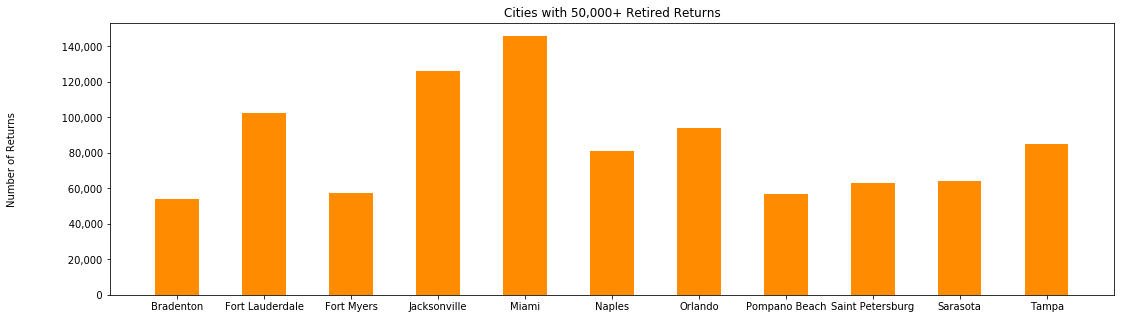

In [13]:
# Question 4 graph.

plt.figure(figsize=(18,5))
High_retire_returns_graph=plt.bar( \
High_retire_returns["City"], High_retire_returns["Total"], color="darkorange", width=0.5)

plt.gca().set_yticklabels(['{:20,.0f}'.format(x) for x in plt.gca().get_yticks()])


plt.title("Cities with 50,000+ Retired Returns")
plt.ylabel("Number of Returns")
plt.savefig("Graphs/Question 4 50000+ Retired Returns")
plt.show()

In [15]:
# Question 5.
# Cities with $1 Billion in retirement income. 
# 16 cities in total.

High_retire_amount= \
Retirement_amount.loc[Retirement_amount["Total"]>1000000000,:]
High_retire_amount_display=High_retire_amount.copy()


High_retire_amount_display["Total"]= \
High_retire_amount_display["Total"].astype(float).map("${:20,.0f}".format)



High_retire_amount_display= \
    High_retire_amount_display.sort_values(by=['Total'], ascending=False)

pd.options.display.max_rows=17
High_retire_amount_display

,City,Total
228,Miami,"$ 2,546,845,000"
167,Jacksonville,"$ 2,422,324,000"
245,Naples,"$ 2,092,829,000"
110,Fort Lauderdale,"$ 1,938,618,000"
272,Orlando,"$ 1,563,765,000"
355,Tampa,"$ 1,559,434,000"
332,Sarasota,"$ 1,434,368,000"
113,Fort Myers,"$ 1,306,817,000"
325,Saint Petersburg,"$ 1,217,372,000"
34,Bradenton,"$ 1,181,783,000"


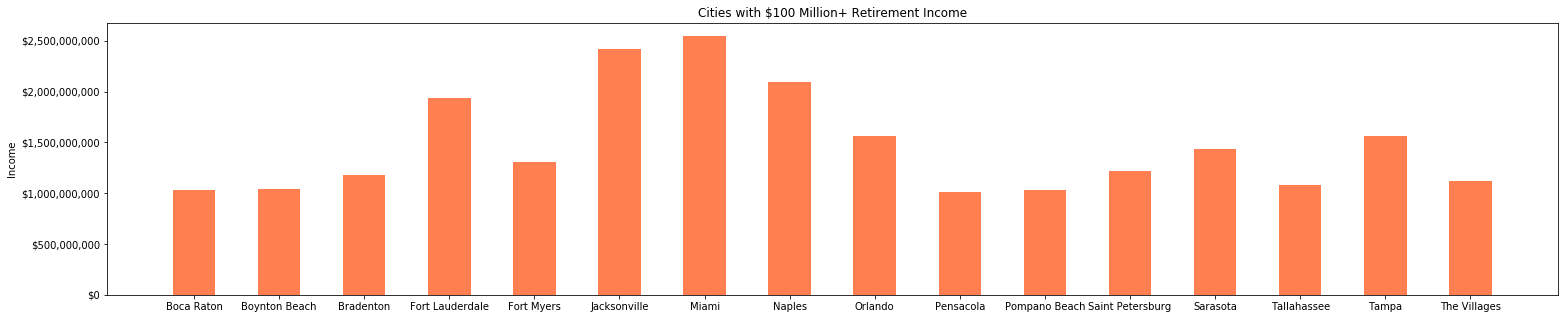

In [16]:
# Question 5 graph.

plt.figure(figsize=(26,5))
High_retire_amount_graph=plt.bar(  \
High_retire_amount["City"], High_retire_amount["Total"], color="coral", width=0.5)


plt.gca().set_yticklabels(['${:0,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.title("Cities with $100 Million+ Retirement Income")
plt.ylabel("Income")
plt.savefig("Graphs/Question 5 100+ Million Retirement Income")
plt.show()

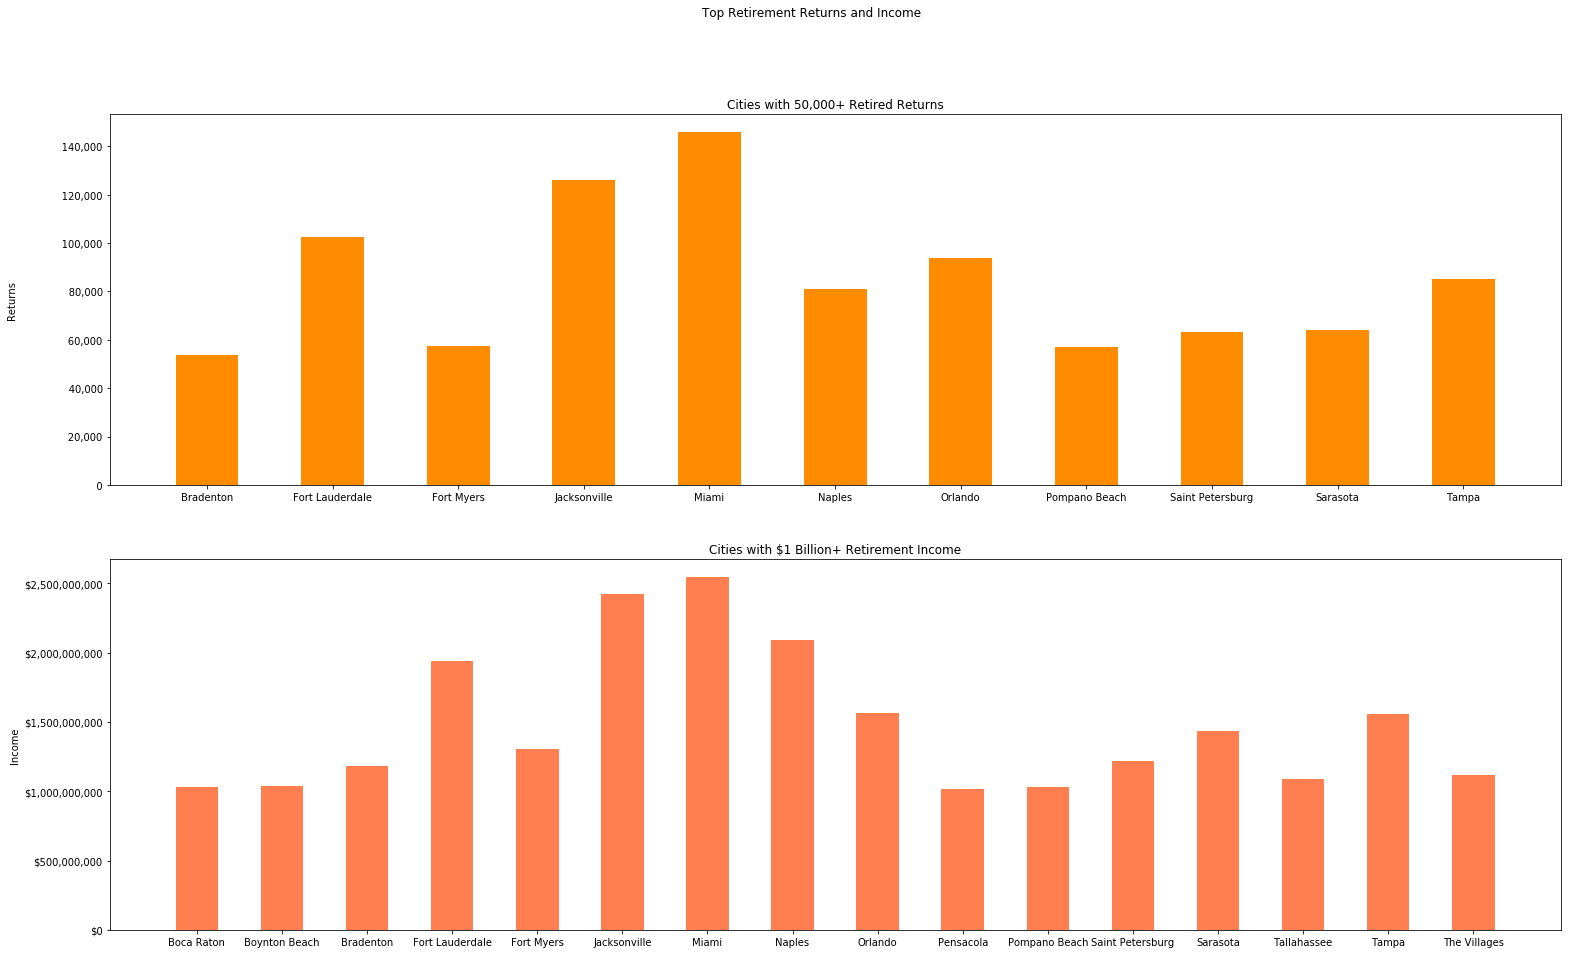

In [17]:
# Question 4 and 5 on one graph.

fig, axs=plt.subplots(2,1, figsize=(26,15))


axs[0].set_title("Cities with 50,000+ Retired Returns")
axs[0].bar(High_retire_returns["City"], High_retire_returns["Total"], color="darkorange", width=0.5)
axs[0].set_ylabel("Returns")
axs[0].set_yticklabels(['{:20,.0f}'.format(x) for x in axs[0].get_yticks()])


axs[1].set_title("Cities with $1 Billion+ Retirement Income")
axs[1].bar(High_retire_amount["City"], High_retire_amount["Total"], color="coral", width=0.5)
axs[1].set_ylabel("Income")
axs[1].set_yticklabels(['${:0,.0f}'.format(x) for x in axs[1].get_yticks()])



fig.suptitle("Top Retirement Returns and Income")
fig.savefig("Graphs/Question 4 and 5 on one graph - Retirement income and returns")

In [17]:
# Question 6.
# Retirement returns based on zip codes.
# Central Florida is the main area for retirement returns.


Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Retire_return_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]


Retire_return_zip["Total"]=( \
Retire_return_zip["Pensions and annuities in AGI: Number of returns"] + \
Retire_return_zip["Taxable Social Security benefits: Number of returns"] + \
Retire_return_zip["Individual retirement arrangement payments: Number of returns"]
)


Retire_return_zip=Retire_return_zip[["Zip Code", "City", "Total"]]
Retire_return_zip=Retire_return_zip.merge(Zip_coord, on="Zip Code")

Retire_return_zip_high=Retire_return_zip.loc[Retire_return_zip["Total"]>3000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_return_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_returns=Retire_return_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_return_map=gmaps.heatmap_layer(Locations, weights=Retire_returns, 
                                 dissipating=False, max_intensity=15000,
                                 point_radius = 1)

fig.add_layer(Retire_return_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Figure(layout=FigureLayout(height='420px'))

In [18]:
# Question 7
# Retirement income by zip codes
# Central Florida is smaller than in returns while Naples has a big presence
# on the heat map.


Retire_amount_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]

Retire_amount_zip["Total"]=( \
Retire_amount_zip["Pensions and annuities in AGI: Amount"] + \
Retire_amount_zip["Taxable Social Security benefits: Amount"] + \
Retire_amount_zip["Individual retirement arrangement payments: Amount"]
)

Retire_amount_zip=Retire_amount_zip[["Zip Code", "City", "Total"]]
Retire_amount_zip=Retire_amount_zip.merge(Zip_coord, on="Zip Code")
Retire_amount_zip["Total"]=Retire_amount_zip["Total"]*1000

Retire_amount_zip_high=Retire_amount_zip.loc[Retire_amount_zip["Total"]>100000000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_amount_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_amount=Retire_amount_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_amount_map=gmaps.heatmap_layer(Locations, weights=Retire_amount, 
                                 dissipating=False, max_intensity=500000000,
                                 point_radius = 1)

fig.add_layer(Retire_amount_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Figure(layout=FigureLayout(height='420px'))

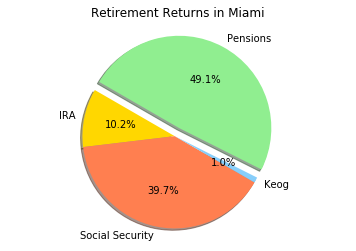

In [371]:
# Question 8
# Retirement return breakdown for top 5 cities + Naples (to give the graph with all
# pie charts a symmetrical 2x3 look).

# Total =   Pensions and annuities in AGI +
#           Taxable Social Security benefits +
#           Individual retirement arrangement payments +
#           Self-employed (Keogh) retirement plans

# Miami breakdown

Miami_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_total=Miami_sum.loc[Miami_sum["City"]=="Miami",:]
IRA_Miami=Miami_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Miami=Miami_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Miami=Miami_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Miami=Miami_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Miami+SS_Miami+Keog_Miami+Pensions_Miami)
perc_IRA_Miami = (IRA_Miami/Total)
perc_SS_Miami=(SS_Miami/Total)
perc_Keog_Miami=(Keog_Miami/Total)
perc_Pensions_Miami=(Pensions_Miami/Total)
percentage_Miami=[perc_IRA_Miami, perc_SS_Miami, perc_Keog_Miami, perc_Pensions_Miami]

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Miami")
plt.pie(percentage_Miami, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Miami.png")
plt.show()

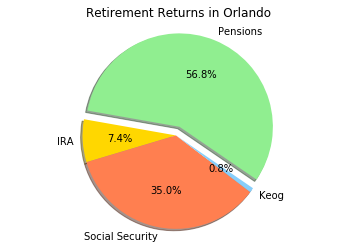

In [370]:
# Question 8 - Orlando

Orlando_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Orlando_total=Orlando_sum.loc[Orlando_sum["City"]=="Orlando",:]
IRA_Orlando=Orlando_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Orlando=Orlando_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Orlando=Orlando_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Orlando=Orlando_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Orlando+SS_Orlando+Keog_Orlando+Pensions_Orlando)
perc_IRA_Orlando= (IRA_Orlando/Total)
perc_SS_Orlando=(SS_Orlando/Total)
perc_Keog_Orlando=(Keog_Orlando/Total)
perc_Pensions_Orlando=(Pensions_Orlando/Total)
percentage_Orlando=[perc_IRA_Orlando, perc_SS_Orlando, perc_Keog_Orlando, perc_Pensions_Orlando]

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Orlando")
plt.pie(percentage_Orlando, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Orlando.png")
plt.show()

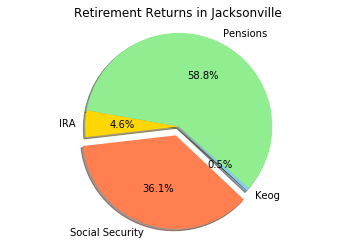

In [367]:
# Question 8 - Jacksonville

Jacksonville_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Jacksonville_total=Jacksonville_sum.loc[Jacksonville_sum["City"]=="Jacksonville",:]
IRA_Jacksonville=Jacksonville_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Jacksonville=Jacksonville_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Jacksonville=Jacksonville_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Jacksonville=Jacksonville_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Jacksonville+SS_Jacksonville+Keog_Jacksonville+Pensions_Jacksonville)

perc_IRA_Jacksonville=(IRA_Jacksonville/Total)
perc_SS_Jacksonville=(SS_Jacksonville/Total)
perc_Keog_Jacksonville=(Keog_Jacksonville/Total)
perc_Pensions_Jacksonville=(Pensions_Jacksonville/Total)
percentage_Jacksonville=[perc_IRA_Jacksonville, perc_SS_Jacksonville, perc_Keog_Jacksonville, perc_Pensions_Jacksonville]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Jacksonville")
plt.pie(percentage_Jacksonville, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Jacksonville.png")
plt.show()

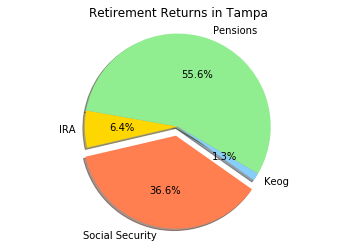

In [366]:
# Question 8 - Tampa

Tampa_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Tampa_total=Tampa_sum.loc[Tampa_sum["City"]=="Tampa",:]
IRA_Tampa=Tampa_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Tampa=Tampa_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Tampa=Tampa_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Tampa=Tampa_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Tampa+SS_Tampa+Keog_Tampa+Pensions_Tampa)

perc_IRA_Tampa=(IRA_Tampa/Total)
perc_SS_Tampa=(SS_Tampa/Total)
perc_Keog_Tampa=(Keog_Tampa/Total)
perc_Pensions_Tampa=(Pensions_Tampa/Total)
percentage_Tampa=[perc_IRA_Tampa, perc_SS_Tampa, perc_Keog_Tampa, perc_Pensions_Tampa]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Tampa")
plt.pie(percentage_Tampa, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Tampa.png")
plt.show()

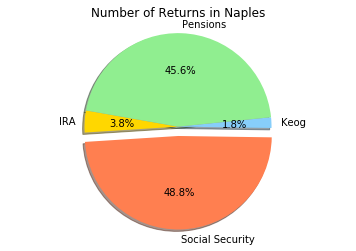

In [365]:
# Question 8 - Naples

Naples_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Naples_total=Naples_sum.loc[Naples_sum["City"]=="Naples",:]
IRA_Naples=Naples_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Naples=Naples_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Naples=Naples_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Naples=Naples_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Naples+SS_Naples+Keog_Naples+Pensions_Naples)

perc_IRA_Naples=(IRA_Naples/Total)
perc_SS_Naples=(SS_Naples/Total)
perc_Keog_Naples=(Keog_Naples/Total)
perc_Pensions_Naples=(Pensions_Naples/Total)
percentage_Naples=[perc_IRA_Naples, perc_SS_Naples, perc_Keog_Naples, perc_Pensions_Naples]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Naples")
plt.pie(percentage_Naples, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Naples.png")
plt.show()

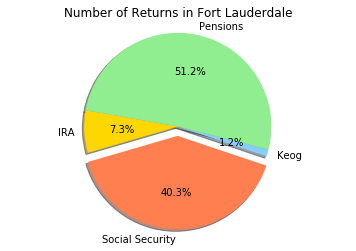

In [362]:
# Question 8 Fort Lauderdale

Ftl_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Ftl_total=Ftl_sum.loc[Ftl_sum["City"]=="Fort Lauderdale",:]
IRA_Ftl=Ftl_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Ftl=Ftl_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Ftl=Ftl_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Ftl=Ftl_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Ftl+SS_Ftl+Keog_Ftl+Pensions_Ftl)

perc_IRA_Ftl=(IRA_Ftl/Total)
perc_SS_Ftl=(SS_Ftl/Total)
perc_Keog_Ftl=(Keog_Ftl/Total)
perc_Pensions_Ftl=(Pensions_Ftl/Total)
percentage_Ftl=[perc_IRA_Ftl, perc_SS_Ftl, perc_Keog_Ftl, perc_Pensions_Ftl]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Fort Lauderdale")
plt.pie(percentage_Ftl, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Fort Lauderdale.png")
plt.show()

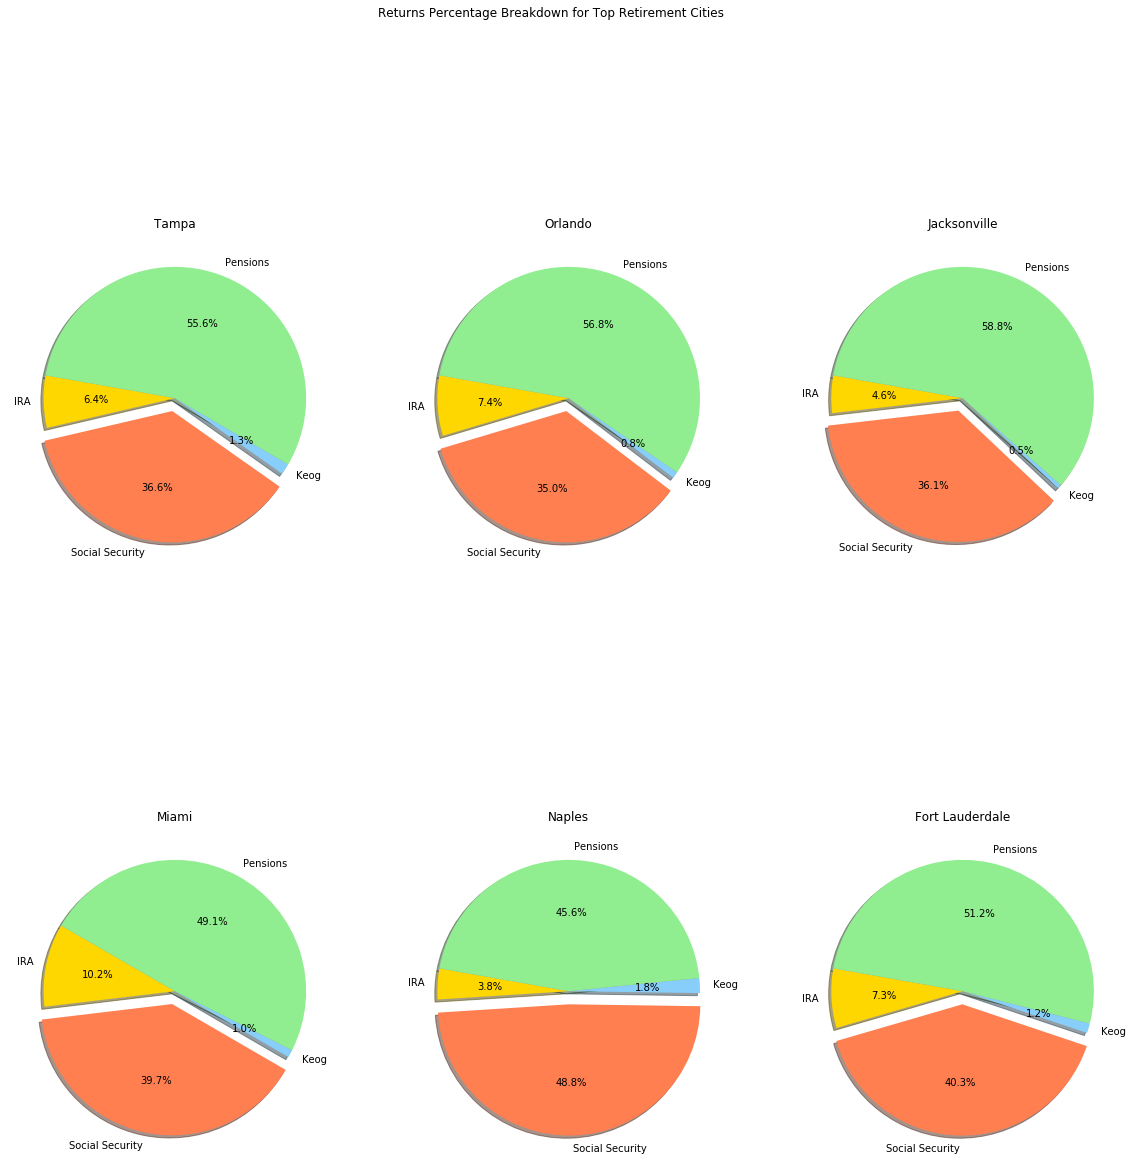

In [374]:
# Question 8 - all on one graph


fig, axs=plt.subplots(2,3, figsize=(20, 20))
axs[1,2].axis('off')

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

axs[1,0].set_title("Miami")
axs[1,0].pie(percentage_Miami, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)


axs[0,1].set_title("Orlando")
axs[0,1].pie(percentage_Orlando, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[0,2].set_title("Jacksonville")
axs[0,2].pie(percentage_Jacksonville, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[0,0].set_title("Tampa")
axs[0,0].pie(percentage_Tampa, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[1,1].set_title("Naples")
axs[1,1].pie(percentage_Naples, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[1,2].set_title("Fort Lauderdale")
axs[1,2].pie(percentage_Ftl, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)



fig.suptitle("Returns Percentage Breakdown for Top Retirement Cities")
fig.savefig("Graphs/Question 8 - All in one graph - Retirement breakdown Top 5 cities")

In [19]:
# Question 9.
# Compare top 5 city data against the entire state.
# Miami pays 8.1% of total taxes collected by the state.


Florida_tax_amount=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_tax_amount=Florida_tax_amount[[ \
            "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]


Florida_tax_amount.insert(0, "Size of adjusted gross income", \
("Under 25,000", "25,000 to 50,000", "50,000 to 75,000", \
"75,000 to 100,000", "100,000 to 200,000", "Over 200,000"))


Florida_tax_total=Florida_tax_amount.sum()
Florida_tax_total["Size of adjusted gross income"]="Total"
Florida_tax_total=Florida_tax_total[["Size of adjusted gross income", \
          "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]


Florida_tax_amount=Florida_tax_amount.append(Florida_tax_total, ignore_index=True)

City_tax_test=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_index=City_tax_test[City_tax_test["City"]=="Miami"].index[0]
Orlando_index=City_tax_test[City_tax_test["City"]=="Orlando"].index[0]
Ftl_index=City_tax_test[City_tax_test["City"]=="Fort Lauderdale"].index[0]
Tampa_index=City_tax_test[City_tax_test["City"]=="Tampa"].index[0]
Jack_index=City_tax_test[City_tax_test["City"]=="Jacksonville"].index[0]

Top_five_tax=City_tax_test.iloc[[ \
            Miami_index, Orlando_index, Ftl_index, Tampa_index, Jack_index]
            ]


Top_five_tax=Top_five_tax[[  \
    "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
    ]


Florida_tax_total1=Florida_tax_total[[ \
        "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
        ]


Florida_tax_total1["City"]="Total"


Top_five_tax["Percentage of total returns"]= \
    Top_five_tax["Number of returns"]/Florida_tax_total1["Number of returns"]


Top_five_tax["Taxable income: Percentage amount"]= \
    Top_five_tax["Taxable income: Amount"]/Florida_tax_total1["Taxable income: Amount"]


Top_five_tax["Total taxes paid: Percentage amount"]= \
    Top_five_tax["Total taxes paid: Amount"]/Florida_tax_total1["Total taxes paid: Amount"]


Top_five_tax_display=Top_five_tax.copy()

Top_five_tax_display["Taxable income: Amount"]= \
Top_five_tax_display["Taxable income: Amount"]*1000


Top_five_tax_display["Taxable income: Amount"]=  \
    Top_five_tax_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
    )

Top_five_tax_display["Total taxes paid: Amount"]= \
Top_five_tax_display["Total taxes paid: Amount"]*1000


Top_five_tax_display["Total taxes paid: Amount"]=  \
    Top_five_tax_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
    )


Top_five_tax_display["Percentage of total returns"]=  \
    Top_five_tax_display["Percentage of total returns"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Taxable income: Percentage amount"]=  \
    Top_five_tax_display["Taxable income: Percentage amount"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Total taxes paid: Percentage amount"]=  \
    Top_five_tax_display["Total taxes paid: Percentage amount"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Number of returns"]=  \
    Top_five_tax_display["Number of returns"].astype(float).map("{:20,.0f}".format
    )


Top_five_tax_display

,City,Number of returns,Taxable income: Amount,Total taxes paid: Amount,Percentage of total returns,Taxable income: Percentage amount,Total taxes paid: Percentage amount
228,Miami,"861,990","$32,521,847,000","$1,267,500,000",0.092%,0.077%,0.081%
272,Orlando,"466,060","$15,291,798,000","$444,988,000",0.050%,0.036%,0.028%
110,Fort Lauderdale,"397,550","$20,654,426,000","$816,362,000",0.043%,0.049%,0.052%
355,Tampa,"359,410","$16,637,257,000","$469,492,000",0.039%,0.039%,0.030%
167,Jacksonville,"405,640","$14,852,767,000","$392,588,000",0.044%,0.035%,0.025%


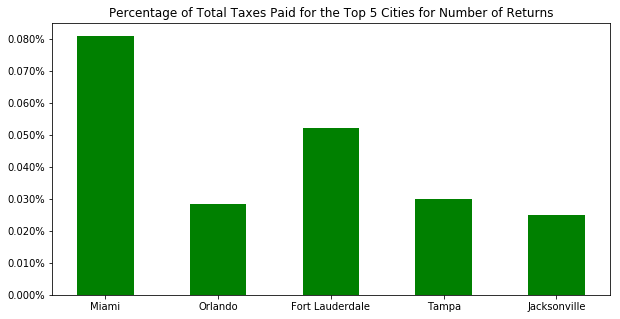

In [20]:
# Question 9 Graph 

plt.figure(figsize=(10,5))
Top_five_tax_plot=plt.bar( \
Top_five_tax["City"], Top_five_tax["Total taxes paid: Percentage amount"], color="green", width=0.5)

plt.gca().set_yticklabels(['{:.3f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Percentage of Total Taxes Paid for the Top 5 Cities for Number of Returns")
plt.savefig("Graphs/Question 9 Top 5 Tax Percentages")
plt.show()

In [21]:
# Question 10
# Cities that paid $100+ million in taxes. 
# 18 cities total.

High_tax_paid=Florida_cities.loc[Florida_cities["Total taxes paid: Amount"]>100000,:]
High_tax_paid=High_tax_paid.groupby(["City"]).sum().reset_index()
High_tax_paid=High_tax_paid[["City", "Total taxes paid: Amount"]]

High_tax_paid["Total taxes paid: Amount"]=High_tax_paid["Total taxes paid: Amount"]*1000

High_tax_paid_display=High_tax_paid.copy()
High_tax_paid_display["Total taxes paid: Amount"]=  \
    High_tax_paid_display["Total taxes paid: Amount"].astype(float).map("${:20,.0f}".format
    )


High_tax_paid_display= \
    High_tax_paid_display.sort_values(by=['Total taxes paid: Amount'], ascending=False)


pd.set_option('display.max_rows', 40)
High_tax_paid_display

,City,Total taxes paid: Amount
7,Miami,"$ 1,202,988,000"
9,Naples,"$ 690,340,000"
3,Fort Lauderdale,"$ 551,471,000"
0,Boca Raton,"$ 345,928,000"
16,Tampa,"$ 339,078,000"
11,Palm Beach,"$ 292,220,000"
8,Miami Beach,"$ 290,601,000"
10,Orlando,"$ 262,073,000"
13,Pompano Beach,"$ 255,190,000"
5,Jacksonville,"$ 228,140,000"


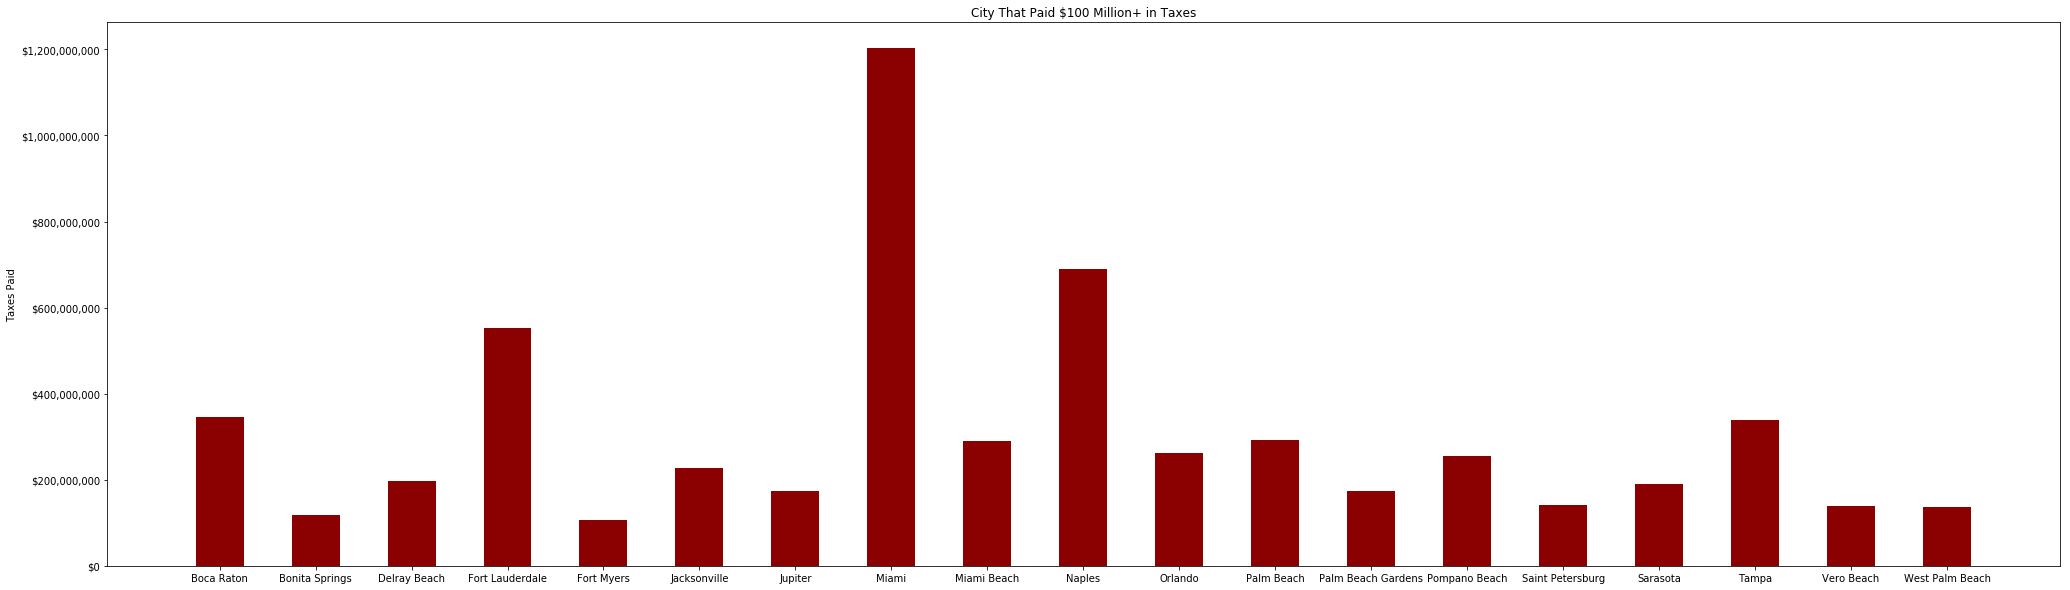

In [23]:
# Question 10 graph

plt.figure(figsize=(35,10))
High_tax_bar=plt.bar(High_tax_paid["City"], High_tax_paid["Total taxes paid: Amount"], \
                    color="darkred",  width=0.5)

plt.gca().set_yticklabels(['${:0,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.ylabel("Taxes Paid")
plt.title("City That Paid $100 Million+ in Taxes")
plt.savefig("Graphs/Question 10 100+ Million Paid")
plt.show()

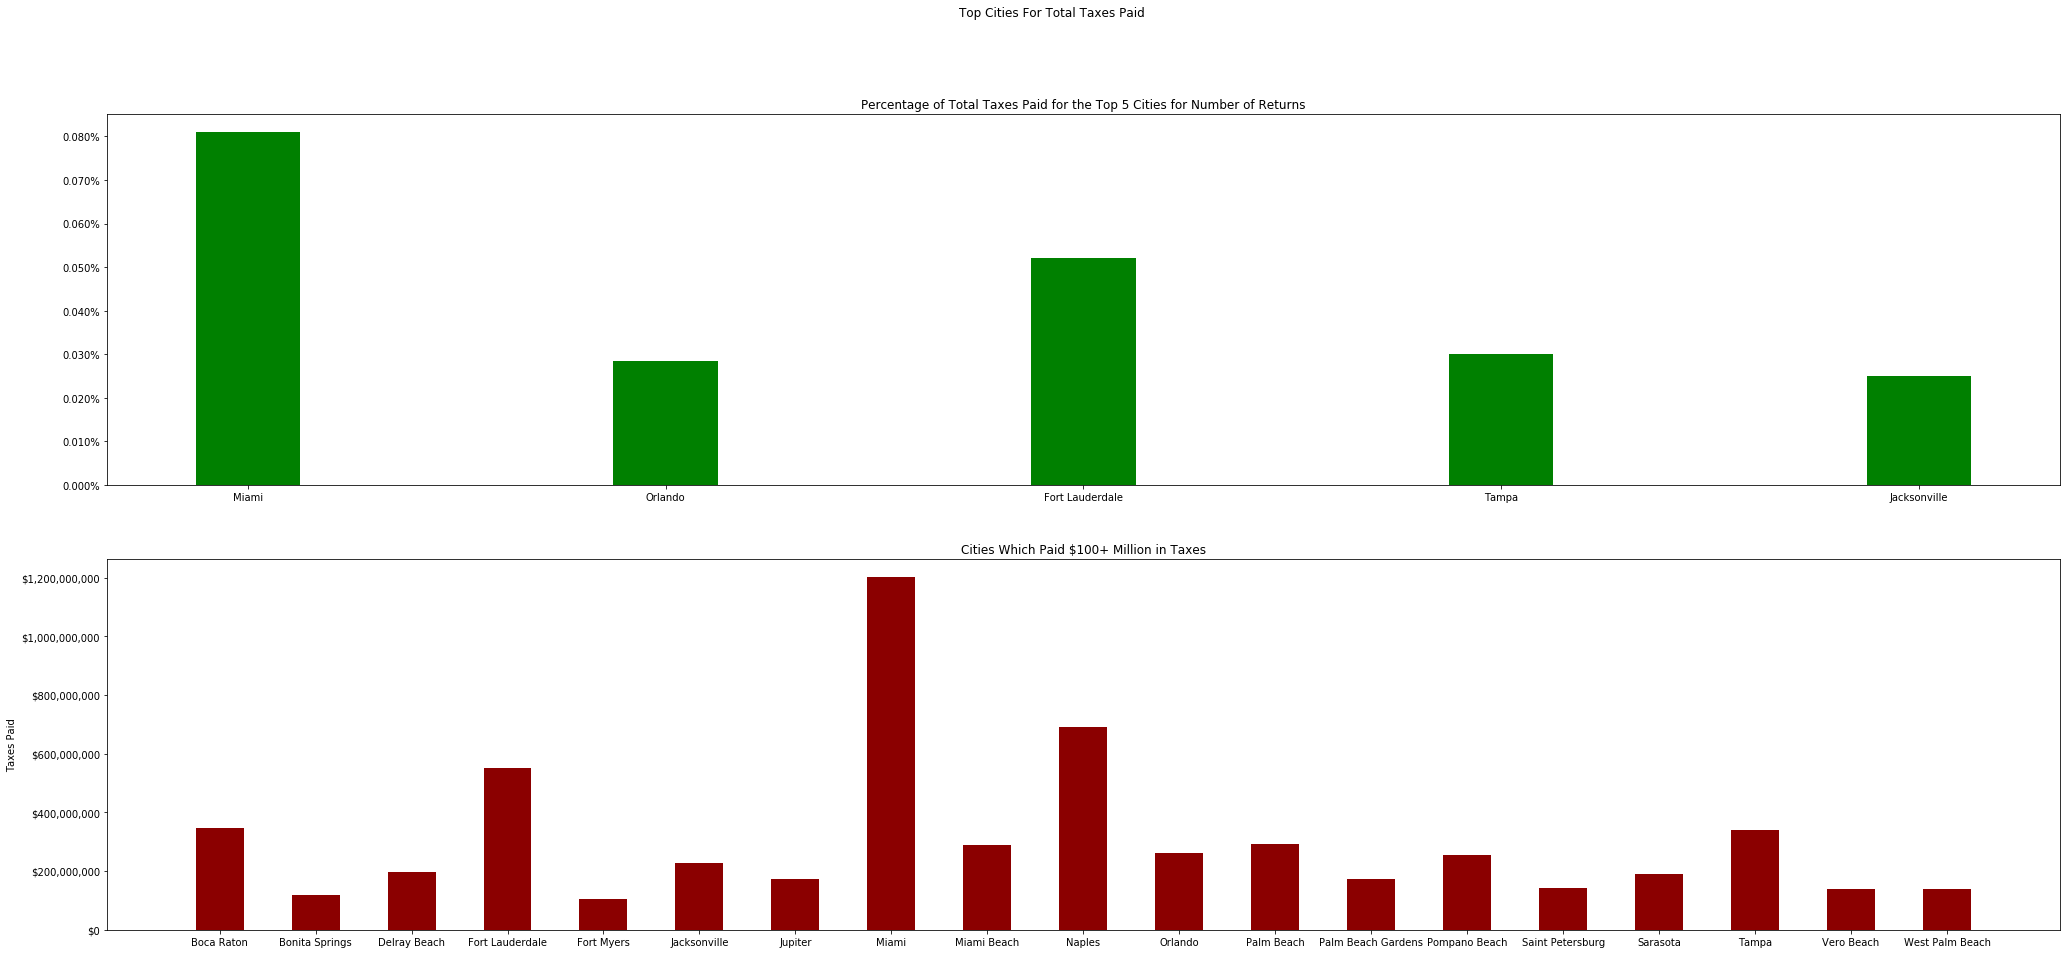

In [76]:
# Question 9 and 10 on one graph.

fig, axs=plt.subplots(2,1, figsize=(35,15))

axs[0].set_title("Percentage of Total Taxes Paid for the Top 5 Cities for Number of Returns")
axs[0].bar( \
Top_five_tax["City"], Top_five_tax["Total taxes paid: Percentage amount"], color="green", width=0.25)


axs[0].set_yticklabels(['{:0,.3f}%'.format(x) for x in axs[0].get_yticks()])

axs[1].set_title("Cities Which Paid $100+ Million in Taxes")
axs[1].bar(High_tax_paid["City"], High_tax_paid["Total taxes paid: Amount"], \
                    color="darkred",  width=0.5)


axs[1].set_yticklabels(['${:0,.0f}'.format(x) for x in axs[1].get_yticks()])
axs[1].set_ylabel("Taxes Paid")

fig.suptitle("Top Cities For Total Taxes Paid")
fig.savefig("Graphs/Question 9 and 10 one graph - $100+ taxes paid, top 5 city percentage")


In [29]:
# Question 11.
# Taxes paid referenced by zip codes instead of city.
# No surprise, Miami area and Naples are the hottest on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})

High_tax_zip=Florida_complete.loc[Florida_complete["Total taxes paid: Amount"]>50000,:]
High_tax_zip=High_tax_zip[["Zip Code", "City", "Total taxes paid: Amount"]]

High_tax_coord=pd.merge(High_tax_zip, Zip_coord, on="Zip Code")

gmaps.configure(api_key=gkey)

Locations=High_tax_coord[["Latitude", "Longitude"]].astype(float)
Taxes_paid=High_tax_coord["Total taxes paid: Amount"].astype(float)

fig=gmaps.figure()

Tax_map= gmaps.heatmap_layer(Locations, weights=Taxes_paid, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)

fig.add_layer(Tax_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
# Question 12.
# Which bracket is paying the taxes?
# $200,000 + brackets pays 44% of the total taxes.

Florida_tax_amount=Florida_cities.groupby([ \
                        "Size of adjusted gross income"], sort=False).sum().reset_index()



Florida_tax_amount=Florida_tax_amount[[ \
    "Number of returns", "Total income: Amount", "Taxable income: Amount", "Total taxes paid: Amount"
    ]
    ]



Florida_tax_amount.insert(0, "Size of adjusted gross income", \
    ("Under 25,000", "25,000 to 50,000", "50,000 to 75,000", \
    "75,000 to 100,000", "100,000 to 200,000", "Over 200,000"
    )
    )


Florida_tax_total=Florida_tax_amount.sum()
Florida_tax_total["Size of adjusted gross income"]="Total"
Florida_tax_total=Florida_tax_total[[ \
        "Size of adjusted gross income", 
        "Number of returns",
        "Total income: Amount",
        "Taxable income: Amount", 
        "Total taxes paid: Amount"
        ]
        ]



Florida_tax_amount=Florida_tax_amount.append(Florida_tax_total, ignore_index=True)
Florida_tax_amount_total=Florida_tax_amount

Florida_tax_amount_total=Florida_tax_amount
Florida_tax_amount_p=Florida_tax_amount


#Store these to prevent key errors.
Return_total=9318970.0
Income_total=607115390
Tax_income_total=423897889
Tax_paid_total=15647600

Florida_tax_amount_p["Percentage of returns"]= \
    Florida_tax_amount_p["Number of returns"]/Return_total



Florida_tax_amount_p["Total income: Percentage"]= \
    Florida_tax_amount_p["Total income: Amount"]/Income_total



Florida_tax_amount_p["Taxable income: Percentage"]= \
    Florida_tax_amount_p["Taxable income: Amount"]/Tax_income_total



Florida_tax_amount_p["Total taxes paid: Percentage"]= \
    Florida_tax_amount_p["Total taxes paid: Amount"]/Tax_paid_total



Florida_tax_amount_p=Florida_tax_amount_p[[ \
                "Size of adjusted gross income", 
                "Percentage of returns", 
                "Total income: Percentage",
                "Taxable income: Percentage", 
                "Total taxes paid: Percentage"
                ]
                ]



Florida_tax_amount_total=Florida_tax_amount[[ \
        "Size of adjusted gross income", 
        "Number of returns",
        "Total income: Amount",
        "Taxable income: Amount", 
        "Total taxes paid: Amount"]
        ]



Florida_tax_amount_total_display=Florida_tax_amount_total

Florida_tax_amount_total_display["Total income: Amount"]= \
Florida_tax_amount_total_display["Total income: Amount"]*1000


Florida_tax_amount_total_display["Total income: Amount"]=  \
Florida_tax_amount_total_display["Total income: Amount"].astype(float).map("${:0,.0f}".format
)


Florida_tax_amount_total_display["Taxable income: Amount"]= \
Florida_tax_amount_total_display["Taxable income: Amount"]*1000


Florida_tax_amount_total_display["Taxable income: Amount"]=  \
Florida_tax_amount_total_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
)

Florida_tax_amount_total_display["Total taxes paid: Amount"]= \
Florida_tax_amount_total_display["Total taxes paid: Amount"]*1000


Florida_tax_amount_total_display["Total taxes paid: Amount"]=  \
Florida_tax_amount_total_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
)


Florida_tax_amount_total_display["Number of returns"]=  \
Florida_tax_amount_total_display["Number of returns"].astype(float).map("{:20,.0f}".format
)


Florida_tax_amount_p=Florida_tax_amount_p.drop([6])


Florida_tax_amount_total_display

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

,Size of adjusted gross income,Number of returns,Total income: Amount,Taxable income: Amount,Total taxes paid: Amount
0,"Under 25,000","3,805,100","$50,167,659,000","$9,385,768,000","$611,185,000"
1,"25,000 to 50,000","2,340,200","$84,929,165,000","$42,261,006,000","$1,339,918,000"
2,"50,000 to 75,000","1,169,570","$72,539,100,000","$46,707,477,000","$1,512,749,000"
3,"75,000 to 100,000","704,210","$61,594,575,000","$43,382,475,000","$1,446,640,000"
4,"100,000 to 200,000","945,710","$129,097,708,000","$99,199,178,000","$3,810,276,000"
5,"Over 200,000","354,180","$208,787,183,000","$182,961,985,000","$6,926,832,000"
6,Total,"9,318,970","$607,115,390,000","$423,897,889,000","$15,647,600,000"


In [15]:
#Question 12 percentages dataframe.

Florida_tax_amount_p_display=Florida_tax_amount_p.copy()

Florida_tax_amount_p_display["Percentage of returns"] = \
Florida_tax_amount_p_display["Percentage of returns"].astype(float).map("{:20,.3f}%".format)

Florida_tax_amount_p_display["Total income: Percentage"] = \
Florida_tax_amount_p_display["Total income: Percentage"].astype(float).map("{:20,.3f}%".format)


Florida_tax_amount_p_display["Taxable income: Percentage"] = \
Florida_tax_amount_p_display["Taxable income: Percentage"].astype(float).map("{:20,.3f}%".format)


Florida_tax_amount_p_display["Total taxes paid: Percentage"] = \
Florida_tax_amount_p_display["Total taxes paid: Percentage"].astype(float).map("{:20,.3f}%".format)



Florida_tax_amount_p_display

,Size of adjusted gross income,Percentage of returns,Total income: Percentage,Taxable income: Percentage,Total taxes paid: Percentage
0,"Under 25,000",0.408%,0.083%,0.022%,0.039%
1,"25,000 to 50,000",0.251%,0.140%,0.100%,0.086%
2,"50,000 to 75,000",0.126%,0.119%,0.110%,0.097%
3,"75,000 to 100,000",0.076%,0.101%,0.102%,0.092%
4,"100,000 to 200,000",0.101%,0.213%,0.234%,0.244%
5,"Over 200,000",0.038%,0.344%,0.432%,0.443%


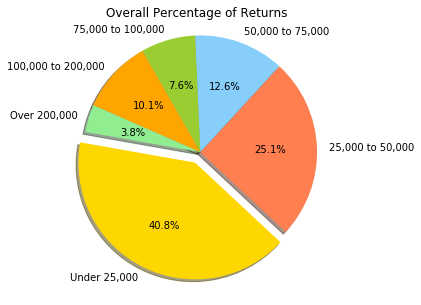

In [335]:
# Question 12 graph.
# Total percentage returns chart
# Under $25,000 is biggest bracket at 40.8%

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Percentage of returns"].values.tolist()

explode=(0.1, 0, 0, 0, 0, 0)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Overall Percentage of Returns")
plt.pie(Florida_tax_amount_p["Percentage of returns"], explode=explode, labels=labels, \
    colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170, labeldistance=1.1)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Overall_Percentages.png")
plt.show()

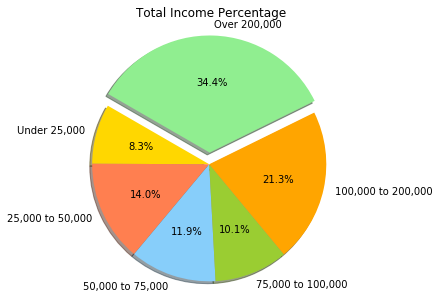

In [17]:
# Question 12 graph.
# Total income chart
# $100,000+ constitudes over 50% of total income.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Total income: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Income Percentage")
plt.pie(Florida_tax_amount_p["Total income: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Total_Income_Percentage.png")
plt.show()

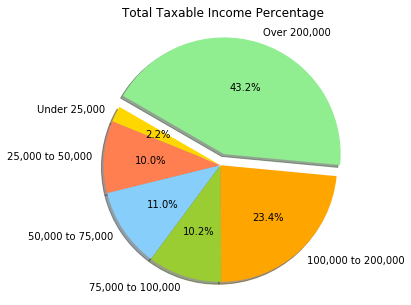

In [336]:
# Question 12 graph.
# Total taxable income chart
# $200,000+ constitudes 43.2% of total taxable income.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Taxable income: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxable Income Percentage")
plt.pie(Florida_tax_amount_p["Taxable income: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Taxable_Income_Percentage.png")
plt.show()

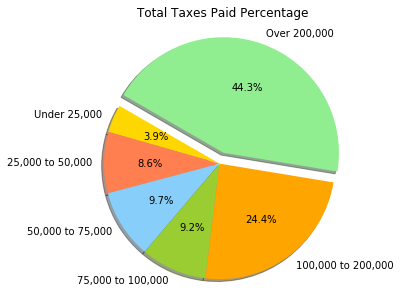

In [337]:
# Question 12 graph.
# Total taxes paid percentage chart.
# $200,000+ pays out 44.3% of total taxes paid.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Total taxes paid: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxes Paid Percentage")
plt.pie(Florida_tax_amount_p["Total taxes paid: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Taxes_Paid_Percentage.png")
plt.show()

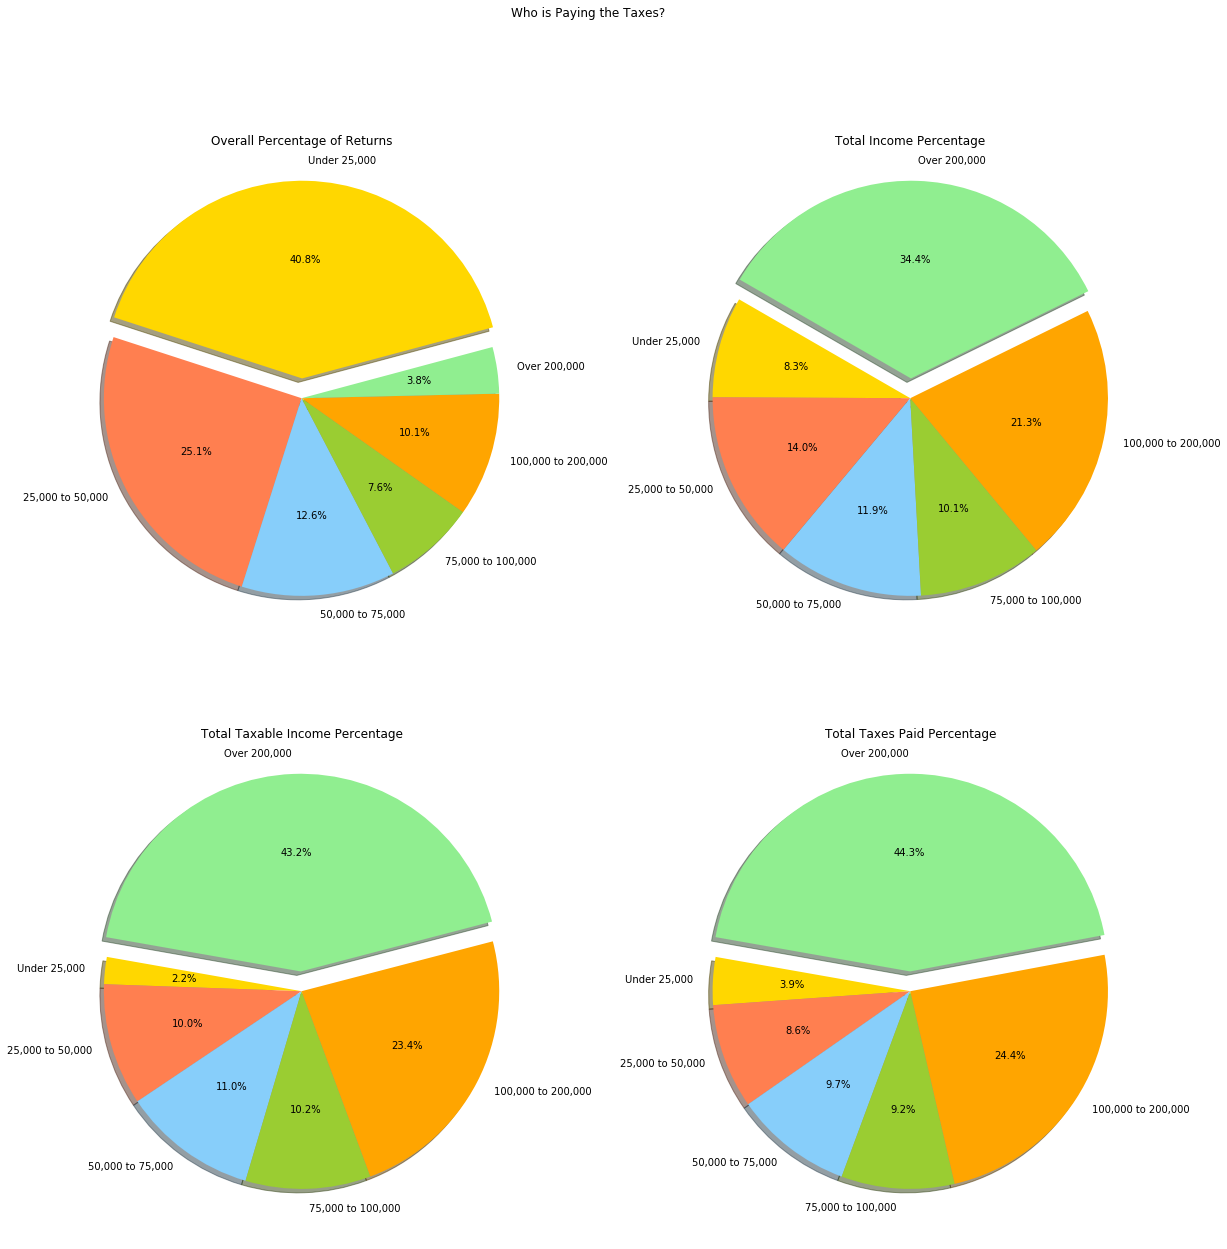

In [31]:
# Question 12 - All graphs together
# Added total income to make the overall graph like more symmetrical.
# Originally, axs[0,1].axis('off') was used when only 3 graphs were used.


explode=(0.1, 0, 0, 0, 0, 0)
explode1=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]
fig, axs=plt.subplots(2, 2, figsize=(20,20))

axs[0,0].set_title("Overall Percentage of Returns")
axs[0,0].pie(Florida_tax_amount_p["Percentage of returns"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode, startangle=15, autopct="%1.1f%%", colors=colors, shadow=True)


axs[0,1].set_title("Total Income Percentage")
axs[0,1].pie(Florida_tax_amount_p["Total income: Percentage"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode1, startangle=150, autopct="%1.1f%%", colors=colors, shadow=True)

          
axs[1,0].set_title("Total Taxable Income Percentage")
axs[1,0].pie(Florida_tax_amount_p["Taxable income: Percentage"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode1, startangle=170, autopct="%1.1f%%", colors=colors, shadow=True)
  
    
axs[1,1].set_title("Total Taxes Paid Percentage")
axs[1,1].pie(Florida_tax_amount_p["Total taxes paid: Percentage"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode1, startangle=170, autopct="%1.1f%%", colors=colors, shadow=True)
        

# axs[0,1].axis('off') - use if only 3 charts are on final graph


    
fig.suptitle("Who is Paying the Taxes?")
fig.savefig("Graphs/Question 12 All graphs together")

In [68]:
# Question 13. 
# Compare total income to total taxable income across the brackets


Florida_cities_total=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_cities_total=Florida_cities_total.sum()
Florida_cities_total["City"]="Total"
Florida_cities_total=Florida_cities_total[["City", "Number of returns",  \
                        "Taxable income: Amount", "Total taxes paid: Amount"]]

Income_compare=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Income_compare=Income_compare[[ \
"Size of adjusted gross income", "Total income: Amount", "Taxable income: Amount", "Total taxes paid: Amount"]]


Income_compare["Percentage of taxable income"]=( \
            Income_compare["Taxable income: Amount"]/Income_compare["Total income: Amount"])


Income_compare["Percentage of non-taxable income"]=1-Income_compare["Percentage of taxable income"]


Income_compare["Percentage of income taxed"]=(  \
            Income_compare["Total taxes paid: Amount"]/Income_compare["Taxable income: Amount"])



Income_compare_display=Income_compare.copy()

Income_compare_display["Taxable income: Amount"]= \
Income_compare_display["Taxable income: Amount"]*1000


Income_compare_display["Taxable income: Amount"]=  \
Income_compare_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Total taxes paid: Amount"]= \
Income_compare_display["Total taxes paid: Amount"]*1000


Income_compare_display["Total taxes paid: Amount"]=  \
Income_compare_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Total income: Amount"]= \
Income_compare_display["Total income: Amount"]*1000


Income_compare_display["Total income: Amount"]=  \
Income_compare_display["Total income: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Percentage of taxable income"]=  \
Income_compare_display["Percentage of taxable income"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display["Percentage of non-taxable income"]=  \
Income_compare_display["Percentage of non-taxable income"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display["Percentage of income taxed"]=  \
Income_compare_display["Percentage of income taxed"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display

,Size of adjusted gross income,Total income: Amount,Taxable income: Amount,Total taxes paid: Amount,Percentage of taxable income,Percentage of non-taxable income,Percentage of income taxed
0,"Under 25,000","$50,167,659,000","$9,385,768,000","$611,185,000",0.187%,0.813%,0.065%
1,"25,000 to 50,000","$84,929,165,000","$42,261,006,000","$1,339,918,000",0.498%,0.502%,0.032%
2,"50,000 to 75,000","$72,539,100,000","$46,707,477,000","$1,512,749,000",0.644%,0.356%,0.032%
3,"75,000 to 100,000","$61,594,575,000","$43,382,475,000","$1,446,640,000",0.704%,0.296%,0.033%
4,"100,000 to 200,000","$129,097,708,000","$99,199,178,000","$3,810,276,000",0.768%,0.232%,0.038%
5,"Over 200,000","$208,787,183,000","$182,961,985,000","$6,926,832,000",0.876%,0.124%,0.038%


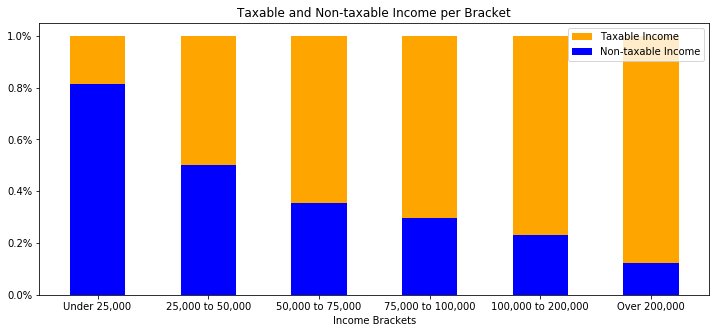

In [69]:
# Question 13 Graph
# Taxable vs non-taxable income

plt.figure(figsize=(12,5))
tax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of taxable income"], color="orange", width=0.5, \
        bottom=Income_compare["Percentage of non-taxable income"])

nontax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of non-taxable income"], color="blue", width=0.5)

plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Taxable and Non-taxable Income per Bracket")
plt.xlabel("Income Brackets")
plt.legend((tax[0], nontax[0]), ("Taxable Income", "Non-taxable Income"), loc="upper right")
plt.savefig("Graphs/Question 13 Taxed vs Nontaxed")
plt.show()

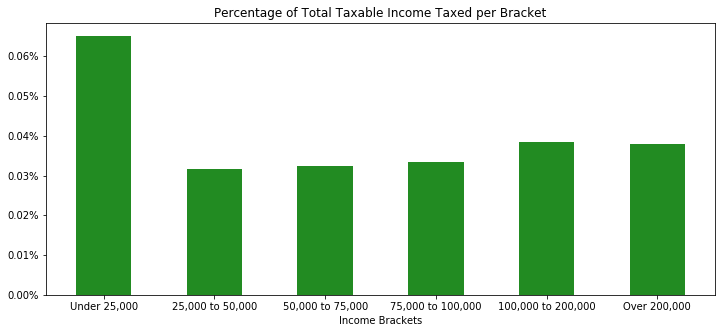

In [70]:
# Question 12 Graph
# Total taxable income taxed per bracket.

plt.figure(figsize=(12,5))
Income_tax=plt.bar(Income_compare["Size of adjusted gross income"], \
        Income_compare["Percentage of income taxed"], color="forestgreen", width=0.5)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Percentage of Total Taxable Income Taxed per Bracket")
plt.xlabel("Income Brackets")
plt.savefig("Graphs/Question 12 Income Taxed per Bracket")
plt.show()

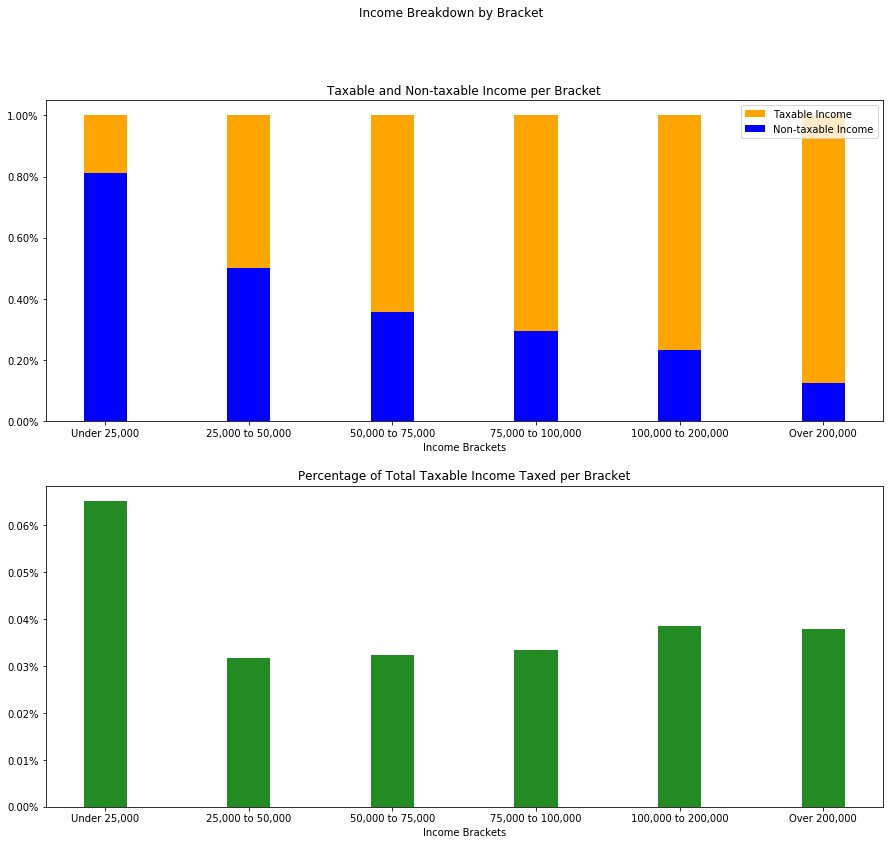

In [77]:
# Question 12 and 13 on one graph.

fig, axs=plt.subplots(2,1, figsize=(15,13))

axs[1].set_title("Percentage of Total Taxable Income Taxed per Bracket")
axs[1].bar(Income_compare["Size of adjusted gross income"], 
        Income_compare["Percentage of income taxed"], color="forestgreen", width=0.3)


axs[1].set_yticklabels(['{:.2f}%'.format(x) for x in axs[1].get_yticks()])
axs[1].set_xlabel("Income Brackets")


axs[0].set_title("Taxable and Non-taxable Income per Bracket")
axs[0].bar(Income_compare["Size of adjusted gross income"],  
        Income_compare["Percentage of taxable income"], color="orange", width=0.3, 
        bottom=Income_compare["Percentage of non-taxable income"], label="Taxable Income")


axs[0].bar(Income_compare["Size of adjusted gross income"],  
        Income_compare["Percentage of non-taxable income"], 
        color="blue", width=0.3, label="Non-taxable Income")


axs[0].set_yticklabels(['{:.2f}%'.format(x) for x in axs[0].get_yticks()])
axs[0].legend(loc="upper right")
axs[0].set_xlabel("Income Brackets")


fig.suptitle("Income Breakdown by Bracket")
fig.savefig("Graphs/Questions 12 and 13 on one graph")

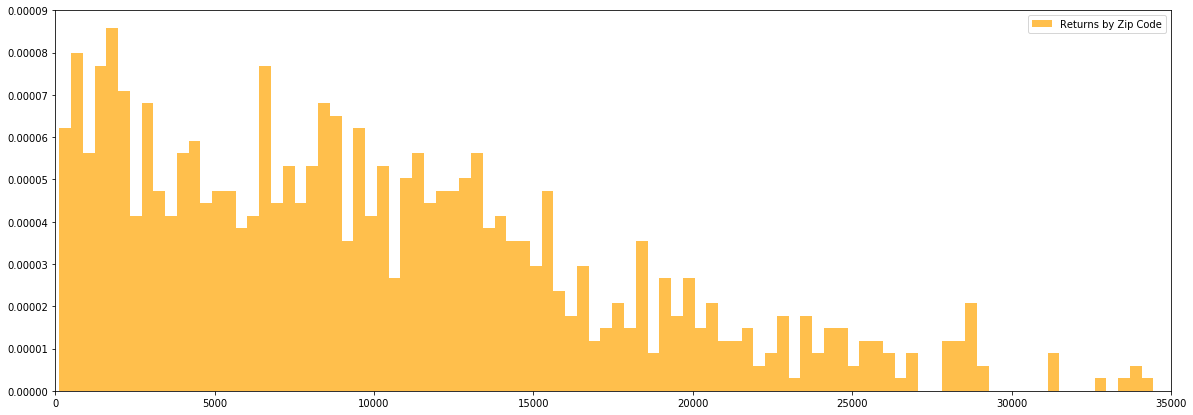

In [121]:
#Question 14.  Statistical analysis - compare city to zip code number of returns
# Zip Code Histogram.  Do not use.

#Ho:  City and Zip code returns have the same distribution
#Ha:  City and Zip Code returns do not have the same distribution


Zip_sum=Florida_complete.groupby(["Zip Code"]).sum().reset_index()

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code", color="orange"
)



plt.xlim((0,35000))
plt.legend()
plt.show()

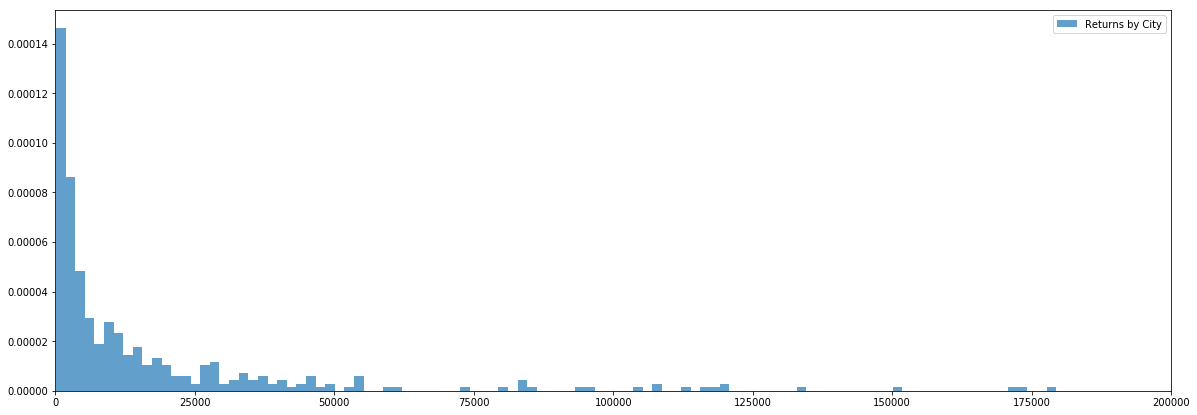

In [122]:
#Question 13.
#City histogram

City_sum=Florida_complete.groupby(["City"]).sum().reset_index()

plt.figure(figsize=(20,7))
City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 500, density=True, alpha=0.7, label="Returns by City")
plt.xlim((0,200000))
plt.legend()
plt.show()

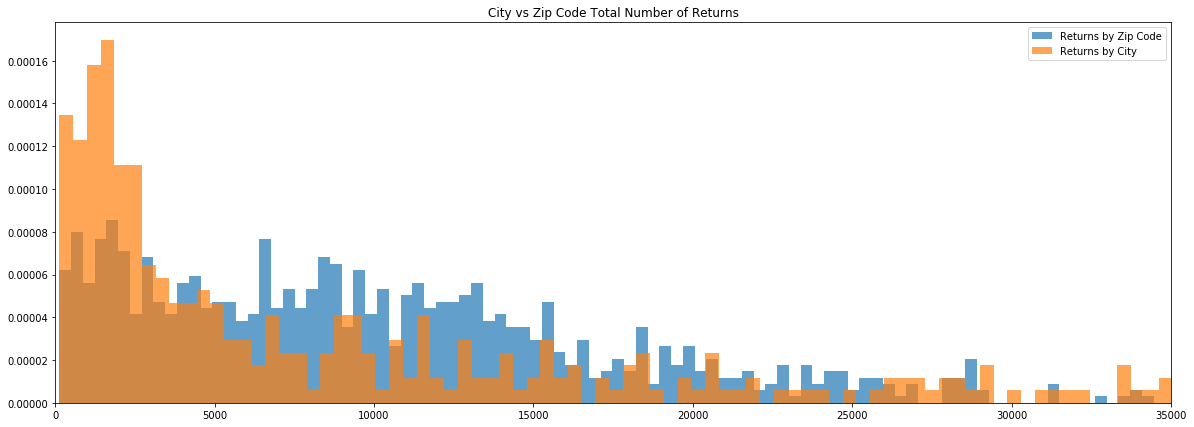

In [282]:
# Question 13.
# Combined Histogram  - Just use this graph.

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
     Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code")


City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 2000, density=True, alpha=0.7, label="Returns by City")



plt.xlim((0,35000))
plt.title("City vs Zip Code Total Number of Returns")
plt.legend()
plt.savefig("Graphs/Question 13 City vs Zip Codes histogram")
plt.show()

In [124]:
# Question 13.
# Testing the null hypothesis.
# Reject null hypothesis.  City and Zip code returns have different distributions.

# City number of returns could be a gamma or pareto distribution but do not have
# enough time to determine.  If found, could be used for further analysis and predictions.

Zip_stats=Zip_sum["Number of returns"]
City_stats=City_sum["Number of returns"]

stats.ttest_ind(City_stats, Zip_stats, equal_var=False)

Ttest_indResult(statistic=4.050761073397962, pvalue=6.132268215097436e-05)

In [125]:
# Zip code returns statistics.

Zip_stats=Zip_sum["Number of returns"]
Zip_stats.describe()

count      917.000000
mean     10162.453653
std       7392.335667
min        130.000000
25%       4160.000000
50%       8880.000000
75%      14260.000000
max      37030.000000
Name: Number of returns, dtype: float64

In [126]:
# City returns statistics.

City_stats=City_sum["Number of returns"]
City_stats.describe()

count       397.000000
mean      23473.476071
std       65293.256512
min         130.000000
25%        1820.000000
50%        6050.000000
75%       19040.000000
max      861990.000000
Name: Number of returns, dtype: float64

In [262]:
# Question 14.
# Regression model.  Do not use.



Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over $200,000",:]

Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000
        
Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]

Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

Florida_upper_analysis_display=Florida_upper_analysis.copy()

for col in Florida_upper_analysis_display.columns:
    if "Amount" in col:
        Florida_upper_analysis_display[col]= \
        Florida_upper_analysis_display[col].astype(float).map("${:0,.0f}".format)
  


y=Florida_upper_analysis["Taxable income: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Taxable income: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

y_train=y[-817:]
y_test=y[:-817]

x_train=x[-817:]
x_test=x[:-817]

regressor=LinearRegression()
regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)

score=r2_score(y_test, y_pred)
print(score)

0.9988010375066717


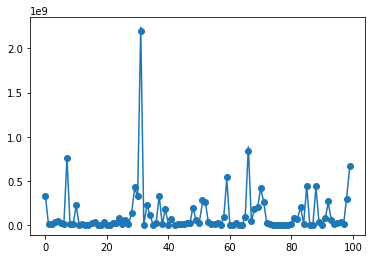

In [245]:
# Question 14 Prediction graph.  Do not use.

Predictions=pd.DataFrame(list(y_pred))
Original=pd.DataFrame(list(y_test))

x=np.arange(0, 100, 1)

plt.scatter(x, Original[0])
plt.plot(x, Predictions[0])

In [5]:
# Question 15
# What variables are significant towards taxable income.
# Stepwise function.  Found reference online.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        #backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included



In [18]:
# Stepwise for total income.


Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over 200,000",:]


Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]
Florida_upper_add=Florida_upper_analysis.copy()
Florida_upper_add=Florida_upper_add[[  \
                    "Number of single returns",
                    "Number of joint returns",
                    "Number of head of household returns",
                    "Number of returns with exemptions",
                    "Number of dependents on returns",
                    ]
                    ]


Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

Florida_upper_analysis=pd.concat( \
            [Florida_upper_add, Florida_upper_analysis], axis=1)


for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000

        
y=Florida_upper_analysis["Total income: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Total income: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

results_income=stepwise_selection(x_df, y_df)

Add  Total taxes paid: Amount       with p-value 0.0
Add  Total tax liability: Amount    with p-value 0.0
Add  Adjusted gross income (AGI): Amount with p-value 0.0
Add  Total statuory adjustments: Amount with p-value 0.0
Drop Total tax liability: Amount    with p-value 0.43657
Add  Ordinary dividends: Amount     with p-value 2.81782e-48
Add  Domestic production activities deduction: Amount with p-value 1.4789e-50
Add  ncome tax before credits: Amount with p-value 9.2939e-22
Add  Business or profession net income: Amount with p-value 9.74001e-21
Drop Total taxes paid: Amount       with p-value 0.451747
Add  Number of joint returns        with p-value 9.29155e-37
Add  Taxable interest: Amount       with p-value 4.6486e-05
Drop Domestic production activities deduction: Amount with p-value 0.586274
Add  Total tax payments: Amount     with p-value 2.99117e-05
Drop Number of joint returns        with p-value 0.219676
Add  Number of head of household returns with p-value 1.40134e-10
Drop Busi

Add  Salaries and wages in AGI: Amount with p-value 7.2317e-06
Drop Investment interest paid: Amount with p-value 0.632351
Add  Total tax payments: Amount     with p-value 1.96712e-12
Drop Taxable income: Amount         with p-value 0.829262
Add  Taxable income: Amount         with p-value 0.000438426
Drop Domestic production activities deduction: Amount with p-value 0.499058
Add  Number of single returns       with p-value 2.0767e-09
Drop State and local income taxes: Amount with p-value 0.717235
Add  Taxable interest: Amount       with p-value 1.09107e-18
Drop Number of single returns       with p-value 0.683808
Add  Domestic production activities deduction: Amount with p-value 0.00150962
Drop Taxable interest: Amount       with p-value 1.0
Add  Child and dependent care credit: Amount with p-value 4.90656e-05
Drop Total itemized deductions: Amount of AGI with p-value 0.43326
Add  Number of single returns       with p-value 1.49074e-10
Drop Child and dependent care credit: Amount with

Add  Self-employment tax: Amount    with p-value 2.94196e-08
Drop Ordinary dividends: Amount     with p-value 0.702302
Drop Total tax payments: Amount     with p-value 0.765099
Add  Taxable Social Security benefits: Amount with p-value 1.47069e-06
Drop ncome tax before credits: Amount with p-value 0.13989
Add  Alternative minimum tax: Amount with p-value 3.69443e-08
Drop Self-employment tax: Amount    with p-value 0.661957
Add  Number of dependents on returns with p-value 2.1457e-06
Drop Number of single returns       with p-value 1.0
Add  Business or profession net income: Amount with p-value 7.5012e-13
Drop Salaries and wages in AGI: Amount with p-value 0.448597
Add  Total tax payments: Amount     with p-value 1.32568e-07
Drop Number of dependents on returns with p-value 0.720509
Add  Number of single returns       with p-value 3.41907e-25
Drop Total tax payments: Amount     with p-value 0.803672
Add  Deductible points: Amount      with p-value 2.9099e-24
Drop Alternative minimum tax

KeyboardInterrupt: 

In [15]:
# Total income significant variables


Sig_total_income=pd.DataFrame(results_income)
Sig_total_income=Sig_total_income.rename( \
                    columns= {0: "Variables with 95%+ Significance for Total Income"}
                    )


pd.option_context('display.max_rows', 25, 'display.max_columns', 5) 

Sig_total_income

NameError: name 'results_income' is not defined

In [9]:
# Stepwise for total taxable income

Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over 200,000",:]


Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]
Florida_upper_add=Florida_upper_analysis.copy()
Florida_upper_add=Florida_upper_add[[  \
                    "Number of single returns",
                    "Number of joint returns",
                    "Number of head of household returns",
                    "Number of returns with exemptions",
                    "Number of dependents on returns",
                    ]
                    ]


Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

Florida_upper_analysis=pd.concat( \
            [Florida_upper_add, Florida_upper_analysis], axis=1)


for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000

        
y=Florida_upper_analysis["Taxable income: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Taxable income: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

results_taxable=stepwise_selection(x_df, y_df)

Add  State and local general sales taxes: Amount with p-value 0.0
Add  Total taxes paid: Amount       with p-value 0.0
Add  Total tax liability: Amount    with p-value 0.0
Add  Total itemized deductions: Amount of AGI with p-value 2.26892e-187
Add  Number of single returns       with p-value 3.54175e-52
Add  Number of joint returns        with p-value 1.09918e-41
Add  Total tax credits: Amount      with p-value 2.49644e-62
Drop State and local general sales taxes: Amount with p-value 0.736782
Add  Total itemized deductions: Amount with p-value 5.93108e-12
Add  Net capital gain in AGI: Amount with p-value 1.25668e-11
Add  Qualified dividends: Amount    with p-value 5.72416e-15
Add  Adjusted gross income (AGI): Amount with p-value 9.34184e-12
Add  Individual retirement arrangement payments: Amount with p-value 4.78856e-07
Add  State and local income taxes: Amount with p-value 1.05825e-06
Add  Pensions and annuities in AGI: Amount with p-value 1.14806e-06
Add  Number of dependents on retu

In [10]:
# Taxable income dataframe.

Sig_taxable_income=pd.DataFrame(results_taxable)
Sig_taxable_income=Sig_taxable_income.rename( \
                    columns= {0: "Variables with 95%+ Significance for Taxable Income"}
                    )

pd.option_context('display.max_rows', 25, 'display.max_columns', 5) 

Sig_taxable_income

,Variables with 95%+ Significance for Taxable Income
0,Total taxes paid: Amount
1,Total itemized deductions: Amount of AGI
2,Number of single returns
3,Total tax credits: Amount
4,Total itemized deductions: Amount
5,Net capital gain in AGI: Amount
6,Qualified dividends: Amount
7,Adjusted gross income (AGI): Amount
8,Individual retirement arrangement payments: Am...
9,State and local income taxes: Amount


In [55]:
#Stepwise for total taxes paid.

Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over 200,000",:]


Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]
Florida_upper_add=Florida_upper_analysis.copy()
Florida_upper_add=Florida_upper_add[[  \
                    "Number of single returns",
                    "Number of joint returns",
                    "Number of head of household returns",
                    "Number of returns with exemptions",
                    "Number of dependents on returns",
                    ]
                    ]


Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

Florida_upper_analysis=pd.concat( \
            [Florida_upper_add, Florida_upper_analysis], axis=1)


for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000

        
y=Florida_upper_analysis["Total taxes paid: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Total taxes paid: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

results_tax_paid=stepwise_selection(x_df, y_df)

Add  Ordinary dividends: Amount     with p-value 0.0
Add  Income tax: Amount             with p-value 1.96775e-279
Add  State and local income taxes: Amount with p-value 1.85784e-150
Add  Real estate taxes: Amount      with p-value 1.39228e-93
Add  Taxable income: Amount         with p-value 1.28978e-44
Add  Number of joint returns        with p-value 6.01214e-42
Add  Total tax payments: Amount     with p-value 2.13145e-12
Add  Total additional Medicare tax: Amount with p-value 1.11953e-10
Drop Ordinary dividends: Amount     with p-value 0.147919
Add  Total statuory adjustments: Amount with p-value 1.44456e-14
Add  Domestic production activities deduction: Amount with p-value 1.94077e-10
Add  Self-employed health insurance deduction: Amount with p-value 7.02138e-17
Add  State and local general sales taxes: Amount with p-value 5.90495e-09
Add  Alternative minimum tax: Amount with p-value 5.87741e-07
Add  Total tax credits: Amount      with p-value 2.12039e-08
Add  Self-employment tax: A

In [56]:
# Total taxes paid dataframe.

Sig_tax_paid=pd.DataFrame(results_tax_paid)
Sig_tax_paid=Sig_tax_paid.rename( \
                    columns= {0: "Variables w/ 95%+ Significance for Total Taxes Paid"}
                    )

pd.set_option('display.max_rows', 40)
Sig_tax_paid

,Variables w/ 95%+ Significance for Total Taxes Paid
0,Income tax: Amount
1,State and local income taxes: Amount
2,Real estate taxes: Amount
3,Taxable income: Amount
4,Total tax payments: Amount
5,Total additional Medicare tax: Amount
6,Total statuory adjustments: Amount
7,Domestic production activities deduction: Amount
8,Self-employed health insurance deduction: Amount
9,State and local general sales taxes: Amount


In [57]:
# This is to see which variables are significant for all three

# DataFrame for total income had to be recreated as for whatever reason,
# the stepwise function loops infinitely for total income.  I have no idea
# why this is occuring as this issue did not start happening until the day
# before the presentation (the other two have identical code with the same
# variables and work without issue).  The dataframe table was saved for the
# powerpoint when it was working properly.
 

Sig_total_income=pd.DataFrame({ \
        "Variables with 95% Significance for Total Income": \
       ["Total itemized deductions: Amount",
        "Number of joint returns",
        "Net capital gain in AGI: Amount",
        "Total tax credits: Amount",
        "Partnership/S-corp net income: Amount",
        "Net investment income tax: Amount",
        "Total charitable contributions: Amount",
        "Tax due at time of filing: Amount",
        "ncome tax before credits: Amount",
        "Alternative minimum tax: Amount",
        "Health care individual responsibilty payment: Amount",
        "Overpayments refunded: Amount",
        "Taxable income: Amount",
        "Domestic production activities deduction: Amount",
        "Salaries and wages in AGI: Amount",
        "Number of exemptions",
        "Number of dependents",
        "Educator expenses: Amount",
        "Net limited miscellaneous deduction: Amount",
        "Income tax: Amount",
        "Pensions and annuities in AGI: Amount"
        ]
        }
        )


In [73]:
# This is compare the rows of each three.  Sig1 works fine but Sig2
# (which compares the taxable income rows to the total taxes paid rows)
# does not work despite all three being lists and total income and taxable
# income having no issues working in Sig1.  Significant variables for total
# taxes paid will be manually compared to the variables in Sig1.

income_rows=Sig_total_income.values
tax_rows=Sig_taxable_income.values
paid_rows=Sig_tax_paid


Sig1=[x for x in income_rows if x in tax_rows]
#Sig2=[y for y in tax_rows if y in paid_rows]

TypeError: unhashable type: 'numpy.ndarray'

In [80]:
# Manually compare Sig1 to the rows in total taxes paid.

# Only "Income tax: Amount" and "Pensions and annuities in AGI: Amount"
# are not in the other two.

Significant_variables=pd.DataFrame(Sig1)

Significant_variables=Significant_variables.drop([7,8])
Significant_variables=Significant_variables.rename( \
                    columns= {0: "Significant Variables for all Three Models"}
                    )


Significant_variables

,Significant Variables for all Three Models
0,Total itemized deductions: Amount
1,Net capital gain in AGI: Amount
2,Total tax credits: Amount
3,Total charitable contributions: Amount
4,Tax due at time of filing: Amount
5,Overpayments refunded: Amount
6,Domestic production activities deduction: Amount
